# Tarea Kristian Cortés Prieto

## Inicialización

### Cargo las librerías 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import pickle
import sys
from collections import Counter
from sklearn.model_selection import train_test_split

sys.path.append('/Users/SoapyGenie/Dropbox/Documentos/Estudios/Master IA/Minerí­a de datos y modelización predictiva')

# Establecemos nuestro escritorio de trabajo
os.chdir('/Users/SoapyGenie/Dropbox/Documentos/Estudios/Master IA/Minerí­a de datos y modelización predictiva/Datos')

# Cargo las funciones que voy a utilizar
from FuncionesMineria import (analizar_variables_categoricas, cuentaDistintos, frec_variables_num, atipicosAmissing, 
                              patron_perdidos, ImputacionCuant, ImputacionCuali, graficoVcramer, mosaico_targetbinaria,
                              boxplot_targetbinaria, hist_targetbinaria, Transf_Auto, lm, Rsq, validacion_cruzada_lm,
                              modelEffectSizes, crear_data_modelo, Vcramer, lm_forward, lm_backward, lm_stepwise,
                              glm, summary_glm, validacion_cruzada_glm, pseudoR2, impVariablesLog, curva_roc, sensEspCorte, glm_stepwise, glm_backward)

### Cargo los datos

In [2]:
datos = pd.read_excel('DatosEleccionesEspaña.xlsx')
datos.head()

,Name,CodigoProvincia,CCAA,Population,TotalCensus,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,...,ComercTTEHosteleria,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones
0,Abadía,10,Extremadura,336,282,20.213,0,60.444,35.555,1.778,...,0.0,0.0,Otro,216.0,326.0,4507.5593,MuyBaja,3.07,1.56,28
1,Abertura,10,Extremadura,429,364,25.275,0,54.779,44.118,0.368,...,0.0,0.0,Otro,382.0,459.0,6270.7646,MuyBaja,-6.54,1.12,67
2,Acebo,10,Extremadura,569,569,27.241,0,44.203,53.140,0.966,...,0.0,0.0,Otro,918.0,674.0,5702.1000,MuyBaja,-15.58,0.62,74
3,Acehúche,10,Extremadura,822,704,30.114,1,50.813,45.325,0.000,...,0.0,0.0,Otro,599.0,842.0,9106.4649,MuyBaja,-2.38,1.37,66
4,Aceituna,10,Extremadura,623,540,30.185,1,44.562,49.867,0.796,...,0.0,0.0,Otro,394.0,625.0,4007.6141,MuyBaja,-0.32,1.58,96


In [3]:
# Genera una lista con los nombres de las variables.
variables = list(datos.columns)
variables

['Name',
 'CodigoProvincia',
 'CCAA',
 'Population',
 'TotalCensus',
 'AbstentionPtge',
 'AbstencionAlta',
 'Izda_Pct',
 'Dcha_Pct',
 'Otros_Pct',
 'Izquierda',
 'Derecha',
 'Age_0-4_Ptge',
 'Age_under19_Ptge',
 'Age_19_65_pct',
 'Age_over65_pct',
 'WomanPopulationPtge',
 'ForeignersPtge',
 'SameComAutonPtge',
 'SameComAutonDiffProvPtge',
 'DifComAutonPtge',
 'UnemployLess25_Ptge',
 'Unemploy25_40_Ptge',
 'UnemployMore40_Ptge',
 'AgricultureUnemploymentPtge',
 'IndustryUnemploymentPtge',
 'ConstructionUnemploymentPtge',
 'ServicesUnemploymentPtge',
 'totalEmpresas',
 'Industria',
 'Construccion',
 'ComercTTEHosteleria',
 'Servicios',
 'ActividadPpal',
 'inmuebles',
 'Pob2010',
 'SUPERFICIE',
 'Densidad',
 'PobChange_pct',
 'PersonasInmueble',
 'Explotaciones']

In [4]:
for var in ['Izquierda', 'Derecha','AbstencionAlta', 'ActividadPpal', 'Densidad', 'CCAA', 'CodigoProvincia']:
    datos[var] = datos[var].astype(str)

#datos['Izquierda'] = datos['Izquierda'].astype(str)
#datos['Derecha'] = datos['Derecha'].astype(str)
#datos['AbstencionAlta'] = datos['AbstencionAlta'].astype(str)
#datos['ActividadPpal'] = datos['ActividadPpal'].astype(str)
#datos['Densidad'] = datos['Densidad'].astype(str)
#datos['CCAA'] = datos['CCAA'].astype(str)
#datos['CodigoProvincia'] = datos['CodigoProvincia'].astype(str)

In [5]:
variables = list(datos.columns)  
numericas = datos.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
categoricas = [variable for variable in variables if variable not in numericas]

# Comprobamos que todas las variables tienen el formato que queremos  
datos.dtypes

Name                             object
CodigoProvincia                  object
CCAA                             object
Population                        int64
TotalCensus                       int64
AbstentionPtge                  float64
AbstencionAlta                   object
Izda_Pct                        float64
Dcha_Pct                        float64
Otros_Pct                       float64
Izquierda                        object
Derecha                          object
Age_0-4_Ptge                    float64
Age_under19_Ptge                float64
Age_19_65_pct                   float64
Age_over65_pct                  float64
WomanPopulationPtge             float64
ForeignersPtge                  float64
SameComAutonPtge                float64
SameComAutonDiffProvPtge        float64
DifComAutonPtge                 float64
UnemployLess25_Ptge             float64
Unemploy25_40_Ptge              float64
UnemployMore40_Ptge             float64
AgricultureUnemploymentPtge     float64


In [6]:
# Frecuencias de los valores en las variables categóricas
analizar_variables_categoricas(datos)

{'Name':                    n         %
 La Zarza           2  0.000246
 Sada               2  0.000246
 Castejón           2  0.000246
 Moya               2  0.000246
 Rebollar           2  0.000246
 ...               ..       ...
 Navia de Suarna    1  0.000123
 Muras              1  0.000123
 Monterroso         1  0.000123
 Monforte de Lemos  1  0.000123
 Zuñeda             1  0.000123
 
 [8102 rows x 2 columns],
 'CodigoProvincia':       n         %
 9   371  0.045695
 37  362  0.044587
 8   311  0.038305
 50  293  0.036088
 19  288  0.035472
 31  272  0.033502
 46  266  0.032763
 5   248  0.030546
 49  248  0.030546
 16  238  0.029314
 44  236  0.029068
 25  231  0.028452
 47  225  0.027713
 10  222  0.027343
 17  221  0.027220
 24  211  0.025988
 40  209  0.025742
 45  204  0.025126
 22  202  0.024880
 34  191  0.023525
 43  184  0.022663
 42  183  0.022540
 28  179  0.022047
 26  174  0.021431
 18  170  0.020939
 6   165  0.020323
 3   141  0.017367
 12  135  0.016628
 48  112  

In [7]:
datos['Izquierda'].unique()

array(['1', '0'], dtype=object)

In [8]:
datos['Derecha'].unique()

array(['0', '1'], dtype=object)

In [9]:
datos['AbstencionAlta'].unique()

array(['0', '1'], dtype=object)

In [10]:
datos['ActividadPpal'].unique()

array(['Otro', 'ComercTTEHosteleria', 'Servicios', 'Construccion',
       'Industria'], dtype=object)

In [11]:
datos['CodigoProvincia'].unique()

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '1',
       '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [12]:
datos['Densidad'].unique()

array(['MuyBaja', '?', 'Baja', 'Alta'], dtype=object)

In [13]:
datos['CCAA'].unique()

array(['Extremadura', 'Andalucía', 'ComValenciana', 'CastillaMancha',
       'Galicia', 'Cataluña', 'PaísVasco', 'Aragón', 'CastillaLeón',
       'Rioja', 'Madrid', 'Murcia', 'Navarra', 'Asturias', 'Canarias',
       'Cantabria', 'Ceuta', 'Melilla', 'Baleares'], dtype=object)

In [14]:
# Cuenta el número de valores distintos de cada una de las variables numéricas de un DataFrame
cuentaDistintos(datos)

,Columna,Distintos
0,Population,3597
1,TotalCensus,3310
2,AbstentionPtge,5675
3,Izda_Pct,6569
4,Dcha_Pct,6682
5,Otros_Pct,4319
6,Age_0-4_Ptge,3761
7,Age_under19_Ptge,5891
8,Age_19_65_pct,6215
9,Age_over65_pct,6778


In [15]:
# Descriptivos variables numéricas mediante función describe() de Python
descriptivos_num = datos.describe().T
# Añadimos más descriptivos a los anteriores
for num in numericas:
    descriptivos_num.loc[num, "Asimetria"] = datos[num].skew()
    descriptivos_num.loc[num, "Kurtosis"] = datos[num].kurtosis()
    descriptivos_num.loc[num, "Mediana"] = datos[num].median()
    descriptivos_num.loc[num, "Rango"] = np.ptp(datos[num].dropna().values)
descriptivos_num

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Mediana,Rango
Population,8119.0,5741.854785,46215.203797,5.0000,166.0000,549.00000,2427.5000,3141991.000,45.996406,2816.861977,549.00000,3.141986e+06
TotalCensus,8119.0,4260.665599,34428.890744,5.0000,140.0000,447.00000,1846.5000,2363829.000,46.510817,2890.837337,447.00000,2.363824e+06
AbstentionPtge,8119.0,26.506951,7.540091,0.0000,21.6780,26.42900,31.4750,57.576,-0.049941,0.497101,26.42900,5.757600e+01
Izda_Pct,8119.0,34.403789,16.482285,0.0000,21.8925,35.16500,46.0320,94.117,0.059920,-0.492922,35.16500,9.411700e+01
Dcha_Pct,8119.0,48.915409,19.945087,0.0000,38.6905,51.58200,62.2010,100.000,-0.468014,-0.175175,51.58200,1.000000e+02
Otros_Pct,8119.0,14.666183,25.093642,0.0000,0.7595,1.88300,16.4970,100.000,1.801732,1.852872,1.88300,1.000000e+02
Age_0-4_Ptge,8119.0,3.019429,2.053726,0.0000,1.3890,2.97800,4.5330,13.245,0.344483,-0.206360,2.97800,1.324500e+01
Age_under19_Ptge,8119.0,13.567747,6.780648,0.0000,8.3340,13.88900,19.0585,33.696,-0.103561,-0.790818,13.88900,3.369600e+01
Age_19_65_pct,8119.0,57.371541,6.818072,23.4590,53.8450,58.65500,61.8180,100.002,-0.814636,2.156761,58.65500,7.654300e+01
Age_over65_pct,8119.0,29.073583,11.745849,0.0000,19.8245,27.55900,36.9080,76.471,0.598441,0.075884,27.55900,7.647100e+01


In [16]:
#datos['Explotaciones'] = datos['Explotaciones'].replace(99999, np.nan)
#datos['SUPERFICIE'] = datos['SUPERFICIE'].replace(175022.910, np.nan)
#datos['Pob2010'] = datos['Pob2010'].replace(3273049, np.nan)
#datos['inmuebles'] = datos['inmuebles'].replace(1615548, np.nan)
#datos['Servicios'] = datos['Servicios'].replace(177677, np.nan)
#datos['totalEmpresas'] = datos['totalEmpresas'].replace(299397.000, np.nan)
#datos['Industria'] = datos['Industria'].replace(10521.000, np.nan)
#datos['Construccion'] = datos['Construccion'].replace(30343.000, np.nan)
#datos['ComercTTEHosteleria'] = datos['ComercTTEHosteleria'].replace(80856.000, np.nan)
#datos['TotalCensus'] = datos['TotalCensus'].replace(2363829.000, np.nan)
#datos['Population'] = datos['Population'].replace(3141991.000, np.nan)
#datos.describe().T

# Descriptivos variables numéricas mediante función describe() de Python
#descriptivos_num = datos.describe().T
#descriptivos_num

# Añadimos más descriptivos a los anteriores
#for num in numericas:
#    descriptivos_num.loc[num, "Asimetria"] = datos[num].skew()
#    descriptivos_num.loc[num, "Kurtosis"] = datos[num].kurtosis()
#    descriptivos_num.loc[num, "Mediana"] = datos[num].median()
#    descriptivos_num.loc[num, "Rango"] = np.ptp(datos[num].dropna().values)
#descriptivos_num

In [17]:
# Muestra valores perdidos
datos[variables].isna().sum()

Name                              0
CodigoProvincia                   0
CCAA                              0
Population                        0
TotalCensus                       0
AbstentionPtge                    0
AbstencionAlta                    0
Izda_Pct                          0
Dcha_Pct                          0
Otros_Pct                         0
Izquierda                         0
Derecha                           0
Age_0-4_Ptge                      0
Age_under19_Ptge                  0
Age_19_65_pct                     0
Age_over65_pct                    0
WomanPopulationPtge               0
ForeignersPtge                    0
SameComAutonPtge                  0
SameComAutonDiffProvPtge          0
DifComAutonPtge                   0
UnemployLess25_Ptge               0
Unemploy25_40_Ptge                0
UnemployMore40_Ptge               0
AgricultureUnemploymentPtge       0
IndustryUnemploymentPtge          0
ConstructionUnemploymentPtge      0
ServicesUnemploymentPtge    

In [18]:
#busco todos los nulos
for x in categoricas:
    datos[x] = datos[x].replace(['nan', '?'], np.nan) 

In [19]:
datos['SameComAutonPtge'] = [x if 0 <= x <= 100 else np.nan for x in datos['SameComAutonPtge']]

In [20]:
datos['ForeignersPtge'] = [x if 0 <= x <= 100 else np.nan for x in datos['ForeignersPtge']]
datos['PobChange_pct'] = [x if -100 <= x <= 100 else np.nan for x in datos['PobChange_pct']]


In [21]:
# Missings no declarados variables cualitativas (NSNC, ?)
datos['ActividadPpal'] = datos['ActividadPpal'].replace(['Construccion','Industria','Servicios'], 'Construccion/Industria/Servicios')

In [22]:
datos['CCAA'] = datos['CCAA'].replace(['Murcia','Ceuta','Melilla'], 'Murcia/Ceuta/Melilla')
datos['CodigoProvincia'] = datos['CodigoProvincia'].replace(['35','52','51'], '35/52/51')

In [23]:
# Agrupación de comunidades autónomas por ubicación geográfica
#datos['CCAA'] = datos['CCAA'].replace(['Asturias', 'Cantabria', 'País Vasco', 'Galicia', 'La Rioja'], 'Norte')
#datos['CCAA'] = datos['CCAA'].replace(['Andalucía', 'Extremadura', 'Región de Murcia'], 'Sur')
#datos['CCAA'] = datos['CCAA'].replace(['Cataluña', 'Comunidad Valenciana', 'Islas Baleares'], 'Este')
#datos['CCAA'] = datos['CCAA'].replace(['Castilla y León', 'Castilla-La Mancha'], 'Oeste')
#datos['CCAA'] = datos['CCAA'].replace(['Comunidad de Madrid', 'Comunidad Foral de Navarra', 'Ceuta', 'Melilla'], 'Centro')

In [24]:
# Agrupación de códigos de provincias por ubicación geográfica
#datos['CodigoProvincia'] = datos['CodigoProvincia'].replace(
#    ['33','24','39','34','9','48','1','20','26','42','31','50','22','25'],
#    'Norte')  # Ejemplo de provincias en el norte

#datos['CodigoProvincia'] = datos['CodigoProvincia'].replace(
#    ['41','14','23','2','30','4','18','29','11','38','35'],
#    'Sur')  # Ejemplo de provincias en el sur

#datos['CodigoProvincia'] = datos['CodigoProvincia'].replace(
#    ['8','43','44','12','46','3','7'],
#    'Este')  # Ejemplo de provincias en el este

#datos['CodigoProvincia'] = datos['CodigoProvincia'].replace(
#    ['21','6','12','37','47','49','32','27','15','36'],
#    'Oeste')  # Ejemplo de provincias en el oeste

#datos['CodigoProvincia'] = datos['CodigoProvincia'].replace(
#    ['40', '28', '19', '45', '16', '13'],
#    'Centro')  # Ejemplo de provincias en el centro

In [25]:
def asignar_etiqueta(valor):
    valor = float(valor)
    if 0 <= valor <= 1:
        return '0-1'
    elif 1 <= valor <= 2:
        return '1-2'
    elif 2 <= valor <= 3:
        return '2-3'
    elif 3 <= valor:
        return '+3'
    else:
        return np.nan

In [26]:
#datos['PersonasInmuebleCate'] = datos['PersonasInmueble'].apply(asignar_etiqueta)
#datos = datos.drop('PersonasInmueble', axis = 1)
#datos['PersonasInmuebleCate'].unique()
datos['PersonasInmueble'] = [x if 0 <= x else np.nan for x in datos['PersonasInmueble']]

In [27]:
def asignar_tramo_porcentaje(valor):
    valor = float(valor)
    if -100 <= valor <= -75:
        return '-100% a -75%'
    elif -75 <= valor <= -50:
        return '-75% a -50%'
    elif -50 <= valor <= 25:
        return '-50% a -25%'
    elif -25 <= valor <= 0:
        return '-25% a 0%'
    elif 0 <= valor <= 25:
        return '0% a 25%'
    elif 25 <= valor <= 50:
        return '25% a 50%'
    elif 50 <= valor <= 75:
        return '50% a 75%'
    elif 75 <= valor <= 100:
        return '70% a 100%'
    else:
        return np.nan

In [28]:
#for var in ['AbstentionPtge', 'WomanPopulationPtge','ForeignersPtge', 'SameComAutonPtge', 'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge', 'Unemploy25_40_Ptge', 'UnemployMore40_Ptge', 'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge', 'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge', 'Age_0-4_Ptge', 'Age_under19_Ptge', 'PobChange_pct', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct', 'Age_19_65_pct', 'Age_over65_pct']:
#    datos[var+'Cate'] = datos[var].apply(asignar_tramo_porcentaje)
#    datos = datos.drop(var, axis = 1)

In [29]:
# Indico la variableObj, el ID y las Input (los atipicos y los missings se gestionan
# solo de las variables input)
#datos = datos.set_index(datos['Name']).drop('Name', axis = 1)
varObjCont = datos['AbstentionPtge']
varObjBin = datos['AbstencionAlta']
datos_input = datos.drop(['AbstentionPtge', 'AbstencionAlta','Name'], axis = 1)

In [30]:
# Genera una lista con los nombres de las variables del cojunto de datos input.
variables_input = list(datos_input.columns)  
variables_input

['CodigoProvincia',
 'CCAA',
 'Population',
 'TotalCensus',
 'Izda_Pct',
 'Dcha_Pct',
 'Otros_Pct',
 'Izquierda',
 'Derecha',
 'Age_0-4_Ptge',
 'Age_under19_Ptge',
 'Age_19_65_pct',
 'Age_over65_pct',
 'WomanPopulationPtge',
 'ForeignersPtge',
 'SameComAutonPtge',
 'SameComAutonDiffProvPtge',
 'DifComAutonPtge',
 'UnemployLess25_Ptge',
 'Unemploy25_40_Ptge',
 'UnemployMore40_Ptge',
 'AgricultureUnemploymentPtge',
 'IndustryUnemploymentPtge',
 'ConstructionUnemploymentPtge',
 'ServicesUnemploymentPtge',
 'totalEmpresas',
 'Industria',
 'Construccion',
 'ComercTTEHosteleria',
 'Servicios',
 'ActividadPpal',
 'inmuebles',
 'Pob2010',
 'SUPERFICIE',
 'Densidad',
 'PobChange_pct',
 'PersonasInmueble',
 'Explotaciones']

In [31]:
# Selecionamos las variables numéricas
numericas_input = datos_input.select_dtypes(include = ['int', 'int32', 'int64','float', 'float32', 'float64']).columns
numericas_input

Index(['Population', 'TotalCensus', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct',
       'Age_0-4_Ptge', 'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria',
       'Servicios', 'inmuebles', 'Pob2010', 'SUPERFICIE', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones'],
      dtype='object')

In [32]:
# Selecionamos las variables categóricas
categoricas_input = [variable for variable in variables_input if variable not in numericas_input]
categoricas_input

['CodigoProvincia',
 'CCAA',
 'Izquierda',
 'Derecha',
 'ActividadPpal',
 'Densidad']

### ATIPICOS

In [33]:
resultados = {x: atipicosAmissing(datos_input[x])[1] / len(datos_input) for x in numericas_input}
resultados

{'Population': 0.09927330952087696,
 'TotalCensus': 0.09619411257544032,
 'Izda_Pct': 0.0,
 'Dcha_Pct': 0.0,
 'Otros_Pct': 0.1040768567557581,
 'Age_0-4_Ptge': 0.0,
 'Age_under19_Ptge': 0.0,
 'Age_19_65_pct': 0.002956029067619165,
 'Age_over65_pct': 0.0,
 'WomanPopulationPtge': 0.0025865254341667695,
 'ForeignersPtge': 0.0,
 'SameComAutonPtge': 0.0,
 'SameComAutonDiffProvPtge': 0.020322699839881758,
 'DifComAutonPtge': 0.004926715112698608,
 'UnemployLess25_Ptge': 0.003202364823254095,
 'Unemploy25_40_Ptge': 0.0,
 'UnemployMore40_Ptge': 0.0,
 'AgricultureUnemploymentPtge': 0.019953196206429363,
 'IndustryUnemploymentPtge': 0.00591205813523833,
 'ConstructionUnemploymentPtge': 0.006527897524325656,
 'ServicesUnemploymentPtge': 0.0,
 'totalEmpresas': 0.0,
 'Industria': 0.0,
 'Construccion': 0.0,
 'ComercTTEHosteleria': 0.0,
 'Servicios': 0.0,
 'inmuebles': 0.0,
 'Pob2010': 0.0,
 'SUPERFICIE': 0.0,
 'PobChange_pct': 0.008129079935952703,
 'PersonasInmueble': 0.0,
 'Explotaciones': 0.06885

In [34]:
numericas_input

Index(['Population', 'TotalCensus', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct',
       'Age_0-4_Ptge', 'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria',
       'Servicios', 'inmuebles', 'Pob2010', 'SUPERFICIE', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones'],
      dtype='object')

In [35]:
datos_input.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,8119.0,5741.854785,46215.203797,5.0000,166.0000,549.00000,2427.5000,3141991.000
TotalCensus,8119.0,4260.665599,34428.890744,5.0000,140.0000,447.00000,1846.5000,2363829.000
Izda_Pct,8119.0,34.403789,16.482285,0.0000,21.8925,35.16500,46.0320,94.117
Dcha_Pct,8119.0,48.915409,19.945087,0.0000,38.6905,51.58200,62.2010,100.000
Otros_Pct,8119.0,14.666183,25.093642,0.0000,0.7595,1.88300,16.4970,100.000
Age_0-4_Ptge,8119.0,3.019429,2.053726,0.0000,1.3890,2.97800,4.5330,13.245
Age_under19_Ptge,8119.0,13.567747,6.780648,0.0000,8.3340,13.88900,19.0585,33.696
Age_19_65_pct,8119.0,57.371541,6.818072,23.4590,53.8450,58.65500,61.8180,100.002
Age_over65_pct,8119.0,29.073583,11.745849,0.0000,19.8245,27.55900,36.9080,76.471
WomanPopulationPtge,8119.0,47.302755,4.361907,11.7650,45.7250,48.48500,50.0000,72.683


In [36]:
# Modifico los atipicos como missings
for x in numericas_input:
    datos_input[x] = atipicosAmissing(datos_input[x])[0]
datos_input.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,7313.0,1255.874060,1840.506786,5.0000,146.00000,431.00000,1485.00000,9208.000
TotalCensus,7338.0,988.485146,1415.143312,5.0000,125.00000,358.00000,1188.75000,6958.000
Izda_Pct,8119.0,34.403789,16.482285,0.0000,21.89250,35.16500,46.03200,94.117
Dcha_Pct,8119.0,48.915409,19.945087,0.0000,38.69050,51.58200,62.20100,100.000
Otros_Pct,7274.0,7.356735,13.510488,0.0000,0.64325,1.59450,4.05050,63.591
Age_0-4_Ptge,8119.0,3.019429,2.053726,0.0000,1.38900,2.97800,4.53300,13.245
Age_under19_Ptge,8119.0,13.567747,6.780648,0.0000,8.33400,13.88900,19.05850,33.696
Age_19_65_pct,8095.0,57.436114,6.599498,30.3580,53.89200,58.67400,61.81900,85.716
Age_over65_pct,8119.0,29.073583,11.745849,0.0000,19.82450,27.55900,36.90800,76.471
WomanPopulationPtge,8098.0,47.361680,4.169580,26.4710,45.75125,48.49150,50.00000,69.231


In [37]:
# Creamos la variable prop_missings que recoge el número de valores perdidos por cada observación
# es la cantidad de variables que estan en nan por cada registro
datos_input['prop_missings'] = datos_input.isna().mean(axis = 1)
datos_input

,CodigoProvincia,CCAA,Population,TotalCensus,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,...,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones,prop_missings
0,10,Extremadura,336.0,282.0,60.444,35.555,1.778,1,0,3.869,...,0.0,Otro,216.0,326.0,4507.5593,MuyBaja,3.07,1.56,28.0,0.000000
1,10,Extremadura,429.0,364.0,54.779,44.118,0.368,1,0,1.632,...,0.0,Otro,382.0,459.0,6270.7646,MuyBaja,-6.54,1.12,67.0,0.000000
2,10,Extremadura,569.0,569.0,44.203,53.140,0.966,0,1,1.230,...,0.0,Otro,918.0,674.0,5702.1000,MuyBaja,-15.58,0.62,74.0,0.000000
3,10,Extremadura,822.0,704.0,50.813,45.325,0.000,1,0,4.258,...,0.0,Otro,599.0,842.0,9106.4649,MuyBaja,-2.38,1.37,66.0,0.000000
4,10,Extremadura,623.0,540.0,44.562,49.867,0.796,0,1,3.531,...,0.0,Otro,394.0,625.0,4007.6141,MuyBaja,-0.32,1.58,96.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,9,CastillaLeón,49.0,41.0,50.000,43.750,3.125,1,0,0.000,...,0.0,Otro,66.0,49.0,1148.3348,MuyBaja,0.00,0.74,2.0,0.026316
8115,9,CastillaLeón,115.0,110.0,18.889,76.667,3.333,0,1,0.000,...,0.0,Otro,130.0,116.0,1876.4605,MuyBaja,-0.86,0.88,19.0,0.000000
8116,9,CastillaLeón,31.0,33.0,25.000,71.429,3.571,0,1,0.000,...,0.0,Otro,59.0,36.0,1081.1846,MuyBaja,-13.89,0.53,11.0,0.000000
8117,9,CastillaLeón,242.0,211.0,37.975,60.126,1.266,0,1,0.826,...,0.0,Otro,285.0,256.0,2257.9414,MuyBaja,-5.47,0.85,47.0,0.000000


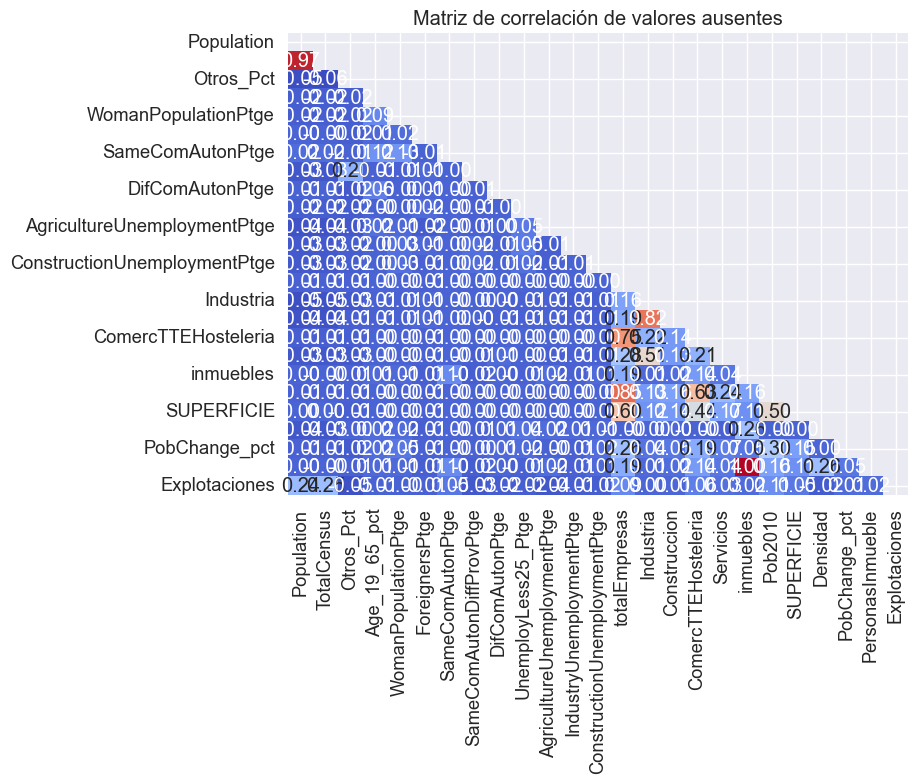

In [38]:
# MISSINGS
# Visualiza un mapa de calor que muestra la matriz de correlación de valores ausentes en el conjunto de datos.
# mas rojo mas perdidos
patron_perdidos(datos_input)

In [39]:
# Muestra total de valores perdidos por cada variable
datos_input[variables_input].isna().sum()

CodigoProvincia                   0
CCAA                              0
Population                      806
TotalCensus                     781
Izda_Pct                          0
Dcha_Pct                          0
Otros_Pct                       845
Izquierda                         0
Derecha                           0
Age_0-4_Ptge                      0
Age_under19_Ptge                  0
Age_19_65_pct                    24
Age_over65_pct                    0
WomanPopulationPtge              21
ForeignersPtge                  653
SameComAutonPtge                  3
SameComAutonDiffProvPtge        165
DifComAutonPtge                  40
UnemployLess25_Ptge              26
Unemploy25_40_Ptge                0
UnemployMore40_Ptge               0
AgricultureUnemploymentPtge     162
IndustryUnemploymentPtge         48
ConstructionUnemploymentPtge     53
ServicesUnemploymentPtge          0
totalEmpresas                     5
Industria                       188
Construccion                

In [40]:
# Muestra proporción de valores perdidos por cada variable (guardo la información)
prop_missingsVars = datos_input.isna().sum()/len(datos_input)
prop_missingsVars

CodigoProvincia                 0.000000
CCAA                            0.000000
Population                      0.099273
TotalCensus                     0.096194
Izda_Pct                        0.000000
Dcha_Pct                        0.000000
Otros_Pct                       0.104077
Izquierda                       0.000000
Derecha                         0.000000
Age_0-4_Ptge                    0.000000
Age_under19_Ptge                0.000000
Age_19_65_pct                   0.002956
Age_over65_pct                  0.000000
WomanPopulationPtge             0.002587
ForeignersPtge                  0.080429
SameComAutonPtge                0.000370
SameComAutonDiffProvPtge        0.020323
DifComAutonPtge                 0.004927
UnemployLess25_Ptge             0.003202
Unemploy25_40_Ptge              0.000000
UnemployMore40_Ptge             0.000000
AgricultureUnemploymentPtge     0.019953
IndustryUnemploymentPtge        0.005912
ConstructionUnemploymentPtge    0.006528
ServicesUnemploy

In [41]:
# Realizamos un estudio descriptivo básico a la nueva variable
datos_input['prop_missings'].describe()

count    8119.000000
mean        0.016362
std         0.024837
min         0.000000
25%         0.000000
50%         0.000000
75%         0.026316
max         0.289474
Name: prop_missings, dtype: float64

In [42]:
# Calculamos el número de valores distintos que tiene la nueva variable
len(datos_input['prop_missings'].unique())

9

In [43]:
# Elimino las observaciones con mas de la mitad de datos missings (no hay ninguna)
eliminar = datos_input['prop_missings'] > 0.5
datos_input = datos_input[~eliminar]
varObjBin = varObjBin[~eliminar]
varObjCont = varObjCont[~eliminar]

In [44]:
# Transformo la nueva variable en categórica (ya que tiene pocos valores diferentes)
datos_input["prop_missings"] = datos_input["prop_missings"].astype(str)

In [45]:
# Agrego 'prop_missings' a la lista de nombres de variables input
variables_input.append('prop_missings')
categoricas_input.append('prop_missings')

In [46]:
# Elimino las variables con mas de la mitad de datos missings (no hay ninguna)
# lo mismo pero en las filas os ea las variables
eliminar = [prop_missingsVars.index[x] for x in range(len(prop_missingsVars)) if prop_missingsVars[x] > 0.5]
datos_input = datos_input.drop(eliminar, axis = 1)

#datos_input.isna().mean(axis = 1).unique()

In [47]:
# Recategorizo categoricas con "suficientes" observaciones missings
# Solo la variable Clasificacion que es la que tiene un 26% missing
# Se considera una categoria mas los missing.
#datos_input['Industria'] = datos_input['Industria'].fillna('Desconocido')
#datos_input['Construccion'] = datos_input['Construccion'].fillna('Desconocido')
#datos_input['Otros_Pct'] = datos_input['Otros_Pct'].fillna('Desconocido')
#datos_input

In [48]:
numericas_input

Index(['Population', 'TotalCensus', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct',
       'Age_0-4_Ptge', 'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria',
       'Servicios', 'inmuebles', 'Pob2010', 'SUPERFICIE', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones'],
      dtype='object')

In [49]:
datos_input.dtypes

CodigoProvincia                  object
CCAA                             object
Population                      float64
TotalCensus                     float64
Izda_Pct                        float64
Dcha_Pct                        float64
Otros_Pct                       float64
Izquierda                        object
Derecha                          object
Age_0-4_Ptge                    float64
Age_under19_Ptge                float64
Age_19_65_pct                   float64
Age_over65_pct                  float64
WomanPopulationPtge             float64
ForeignersPtge                  float64
SameComAutonPtge                float64
SameComAutonDiffProvPtge        float64
DifComAutonPtge                 float64
UnemployLess25_Ptge             float64
Unemploy25_40_Ptge              float64
UnemployMore40_Ptge             float64
AgricultureUnemploymentPtge     float64
IndustryUnemploymentPtge        float64
ConstructionUnemploymentPtge    float64
ServicesUnemploymentPtge        float64


In [50]:
## IMPUTACIONES
# Imputo todas las cuantitativas, seleccionar el tipo de imputacion: media, mediana o aleatorio
# esto lo que hace es que a las NaN de aqui les pone un valor aleatorio pero siguiendo la distribucion con el objetivo de no perder el valor de las demas variables
for x in numericas_input:
    datos_input[x] = ImputacionCuant(datos_input[x], 'aleatorio')

In [51]:
# Imputo todas las cualitativas, seleccionar el tipo de imputacion: moda o aleatorio
for x in categoricas_input:
    datos_input[x] = ImputacionCuali(datos_input[x], 'aleatorio')

In [52]:
# Reviso que no queden datos missings
datos_input.isna().sum()

CodigoProvincia                 0
CCAA                            0
Population                      0
TotalCensus                     0
Izda_Pct                        0
Dcha_Pct                        0
Otros_Pct                       0
Izquierda                       0
Derecha                         0
Age_0-4_Ptge                    0
Age_under19_Ptge                0
Age_19_65_pct                   0
Age_over65_pct                  0
WomanPopulationPtge             0
ForeignersPtge                  0
SameComAutonPtge                0
SameComAutonDiffProvPtge        0
DifComAutonPtge                 0
UnemployLess25_Ptge             0
Unemploy25_40_Ptge              0
UnemployMore40_Ptge             0
AgricultureUnemploymentPtge     0
IndustryUnemploymentPtge        0
ConstructionUnemploymentPtge    0
ServicesUnemploymentPtge        0
totalEmpresas                   0
Industria                       0
Construccion                    0
ComercTTEHosteleria             0
Servicios     

In [53]:
# Descriptivos variables numéricas mediante función describe() de Python
descriptivos_num = datos_input.describe().T
descriptivos_num


,count,mean,std,min,25%,50%,75%,max
Population,8119.0,1252.698116,1845.137501,5.0000,146.5000,430.0000,1455.00000,9208.000
TotalCensus,8119.0,984.288582,1408.058406,5.0000,125.0000,358.0000,1179.50000,6958.000
Izda_Pct,8119.0,34.403789,16.482285,0.0000,21.8925,35.1650,46.03200,94.117
Dcha_Pct,8119.0,48.915409,19.945087,0.0000,38.6905,51.5820,62.20100,100.000
Otros_Pct,8119.0,7.569597,13.692452,0.0000,0.7080,1.6390,4.41100,63.591
Age_0-4_Ptge,8119.0,3.019429,2.053726,0.0000,1.3890,2.9780,4.53300,13.245
Age_under19_Ptge,8119.0,13.567747,6.780648,0.0000,8.3340,13.8890,19.05850,33.696
Age_19_65_pct,8119.0,57.436479,6.595351,30.3580,53.8920,58.6680,61.81900,85.716
Age_over65_pct,8119.0,29.073583,11.745849,0.0000,19.8245,27.5590,36.90800,76.471
WomanPopulationPtge,8119.0,47.361563,4.166443,26.4710,45.7520,48.4870,50.00000,69.231


In [54]:
### Vuelo lo que no me importa
#datos_input = datos_input.drop(['CodigoProvincia','Population', 'Pob2010', 'SUPERFICIE', 'Name'], axis = 1) # 'SameComAutonPtgeCate', 'SameComAutonDiffProvPtgeCate', 'DifComAutonPtgeCate', 'PobChange_pctCate', 'Age_0-4_PtgeCate'

In [55]:
# Genera una lista con los nombres de las variables.
variables = list(datos_input.columns)  
variables

['CodigoProvincia',
 'CCAA',
 'Population',
 'TotalCensus',
 'Izda_Pct',
 'Dcha_Pct',
 'Otros_Pct',
 'Izquierda',
 'Derecha',
 'Age_0-4_Ptge',
 'Age_under19_Ptge',
 'Age_19_65_pct',
 'Age_over65_pct',
 'WomanPopulationPtge',
 'ForeignersPtge',
 'SameComAutonPtge',
 'SameComAutonDiffProvPtge',
 'DifComAutonPtge',
 'UnemployLess25_Ptge',
 'Unemploy25_40_Ptge',
 'UnemployMore40_Ptge',
 'AgricultureUnemploymentPtge',
 'IndustryUnemploymentPtge',
 'ConstructionUnemploymentPtge',
 'ServicesUnemploymentPtge',
 'totalEmpresas',
 'Industria',
 'Construccion',
 'ComercTTEHosteleria',
 'Servicios',
 'ActividadPpal',
 'inmuebles',
 'Pob2010',
 'SUPERFICIE',
 'Densidad',
 'PobChange_pct',
 'PersonasInmueble',
 'Explotaciones',
 'prop_missings']

In [56]:
datos_input

,CodigoProvincia,CCAA,Population,TotalCensus,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,...,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones,prop_missings
0,10,Extremadura,336.0,282.0,60.444,35.555,1.778,1,0,3.869,...,0.0,Otro,216.0,326.0,4507.5593,MuyBaja,3.07,1.56,28.0,0.0
1,10,Extremadura,429.0,364.0,54.779,44.118,0.368,1,0,1.632,...,0.0,Otro,382.0,459.0,6270.7646,MuyBaja,-6.54,1.12,67.0,0.0
2,10,Extremadura,569.0,569.0,44.203,53.140,0.966,0,1,1.230,...,0.0,Otro,918.0,674.0,5702.1000,MuyBaja,-15.58,0.62,74.0,0.0
3,10,Extremadura,822.0,704.0,50.813,45.325,0.000,1,0,4.258,...,0.0,Otro,599.0,842.0,9106.4649,MuyBaja,-2.38,1.37,66.0,0.0
4,10,Extremadura,623.0,540.0,44.562,49.867,0.796,0,1,3.531,...,0.0,Otro,394.0,625.0,4007.6141,MuyBaja,-0.32,1.58,96.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,9,CastillaLeón,49.0,41.0,50.000,43.750,3.125,1,0,0.000,...,0.0,Otro,66.0,49.0,1148.3348,MuyBaja,0.00,0.74,2.0,0.02631578947368421
8115,9,CastillaLeón,115.0,110.0,18.889,76.667,3.333,0,1,0.000,...,0.0,Otro,130.0,116.0,1876.4605,MuyBaja,-0.86,0.88,19.0,0.0
8116,9,CastillaLeón,31.0,33.0,25.000,71.429,3.571,0,1,0.000,...,0.0,Otro,59.0,36.0,1081.1846,MuyBaja,-13.89,0.53,11.0,0.0
8117,9,CastillaLeón,242.0,211.0,37.975,60.126,1.266,0,1,0.826,...,0.0,Otro,285.0,256.0,2257.9414,MuyBaja,-5.47,0.85,47.0,0.0


In [57]:
varObjBin

0       0
1       0
2       0
3       1
4       1
       ..
8114    0
8115    0
8116    0
8117    0
8118    0
Name: AbstencionAlta, Length: 8119, dtype: object

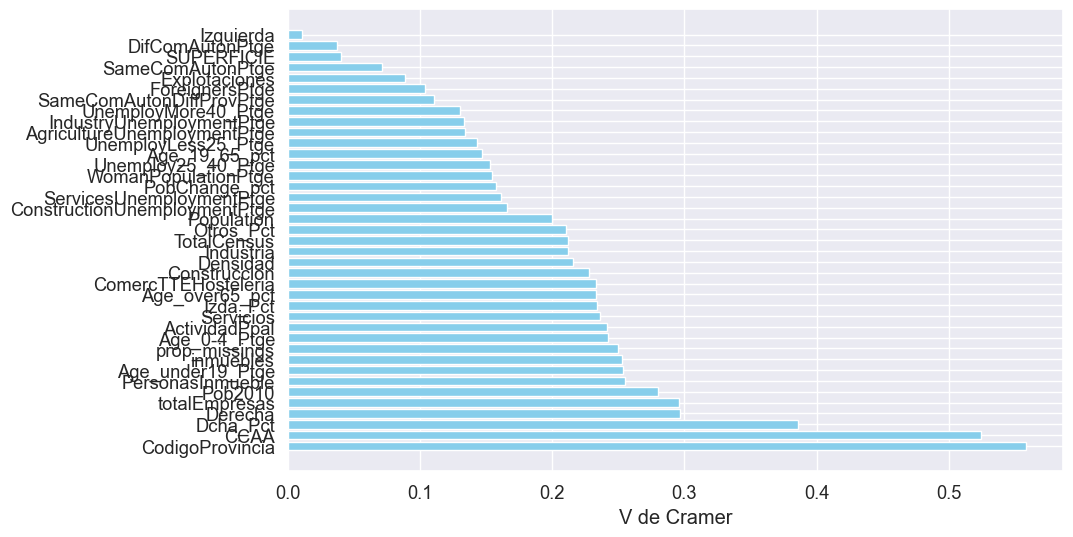

In [58]:
# Obtengo la importancia de las variables
graficoVcramer(datos_input, varObjBin)

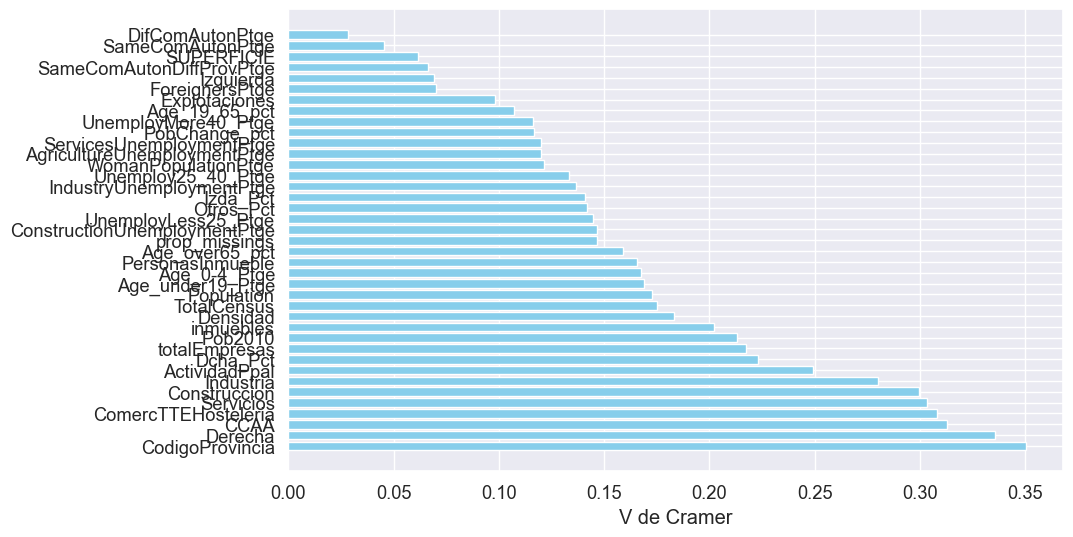

In [59]:
# Obtengo la importancia de las variables
graficoVcramer(datos_input, varObjCont)

In [60]:
# Crear un DataFrame para almacenar los resultados del coeficiente V de Cramer
VCramer = pd.DataFrame(columns=['Variable', 'Objetivo', 'Vcramer'])

In [61]:
for variable in variables:
    v_cramer = Vcramer(datos_input[variable], varObjCont)
    # Convertir el diccionario en un DataFrame de una fila
    nueva_fila = pd.DataFrame([{'Variable': variable, 'Objetivo': varObjCont.name, 'Vcramer': v_cramer}])
    
    # Concatenar el nuevo DataFrame de una fila con el DataFrame existente
    VCramer = pd.concat([VCramer, nueva_fila], ignore_index=True)
    pd.concat([VCramer, nueva_fila], ignore_index=True)
VCramer

,Variable,Objetivo,Vcramer
0,CodigoProvincia,AbstentionPtge,0.350420
1,CCAA,AbstentionPtge,0.312779
2,Population,AbstentionPtge,0.172539
3,TotalCensus,AbstentionPtge,0.174908
4,Izda_Pct,AbstentionPtge,0.140749
5,Dcha_Pct,AbstentionPtge,0.223135
6,Otros_Pct,AbstentionPtge,0.142035
7,Izquierda,AbstentionPtge,0.069026
8,Derecha,AbstentionPtge,0.335735
9,Age_0-4_Ptge,AbstentionPtge,0.167351


In [62]:
for variable in variables:
    v_cramer = Vcramer(datos_input[variable], varObjBin)
    # Convertir el diccionario en un DataFrame de una fila
    nueva_fila = pd.DataFrame([{'Variable': variable, 'Objetivo': varObjBin.name, 'Vcramer': v_cramer}])
    
    # Concatenar el nuevo DataFrame de una fila con el DataFrame existente
    VCramer = pd.concat([VCramer, nueva_fila], ignore_index=True)
    pd.concat([VCramer, nueva_fila], ignore_index=True)
VCramer

,Variable,Objetivo,Vcramer
0,CodigoProvincia,AbstentionPtge,0.350420
1,CCAA,AbstentionPtge,0.312779
2,Population,AbstentionPtge,0.172539
3,TotalCensus,AbstentionPtge,0.174908
4,Izda_Pct,AbstentionPtge,0.140749
...,...,...,...
73,Densidad,AbstencionAlta,0.215850
74,PobChange_pct,AbstencionAlta,0.157396
75,PersonasInmueble,AbstencionAlta,0.254617
76,Explotaciones,AbstencionAlta,0.088716


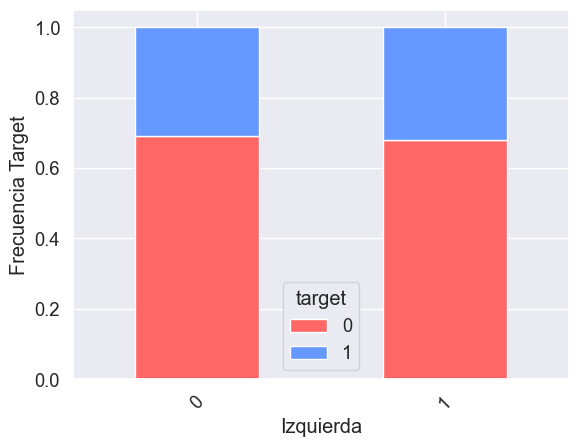

In [63]:
# Veo graficamente el efecto de dos variables cualitativas sobre la binaria
# Tomo las variables con más y menos relación con la variable objetivo Binaria
mosaico_targetbinaria(datos_input['Izquierda'], varObjBin, 'Izquierda')

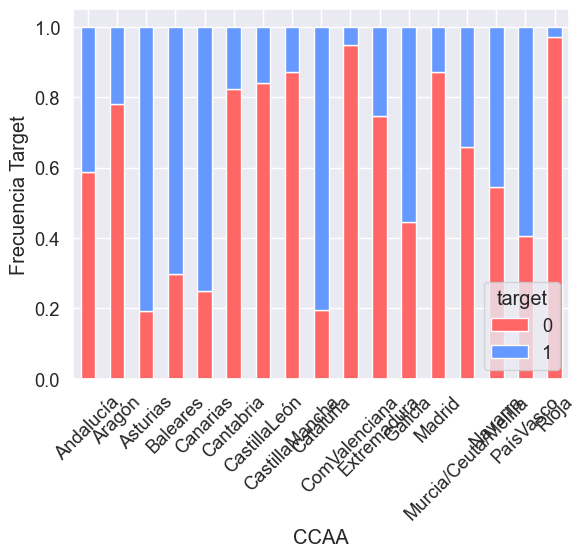

In [64]:
# Veo graficamente el efecto de dos variables cualitativas sobre la binaria
# Tomo las variables con más y menos relación con la variable objetivo Binaria
mosaico_targetbinaria(datos_input['CCAA'], varObjBin, 'CCAA')

In [65]:
numericas = datos_input.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
numericas

Index(['Population', 'TotalCensus', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct',
       'Age_0-4_Ptge', 'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria',
       'Servicios', 'inmuebles', 'Pob2010', 'SUPERFICIE', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones'],
      dtype='object')

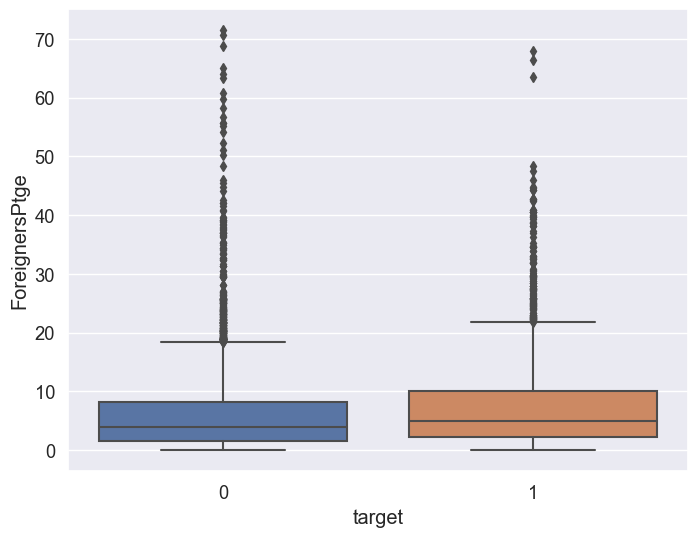

In [66]:
# Veo graficamente el efecto de dos variables cuantitativas sobre la binaria
boxplot_targetbinaria(datos_input['ForeignersPtge'], varObjBin, 'ForeignersPtge')

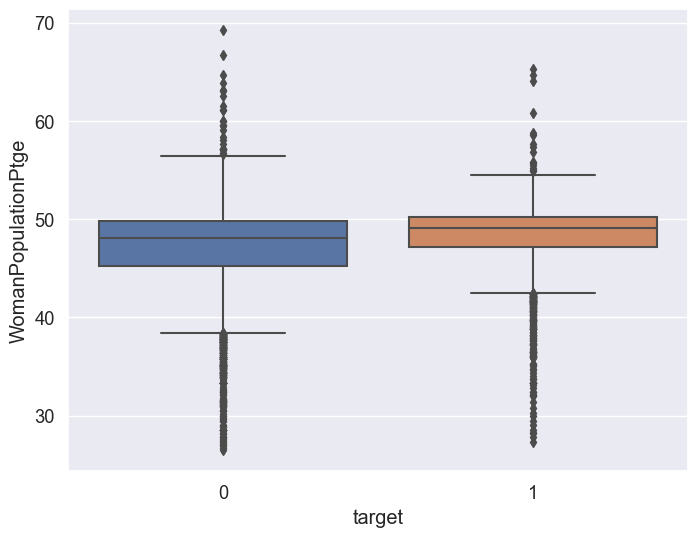

In [67]:
# Veo graficamente el efecto de dos variables cuantitativas sobre la binaria
boxplot_targetbinaria(datos_input['WomanPopulationPtge'], varObjBin, 'WomanPopulationPtge')

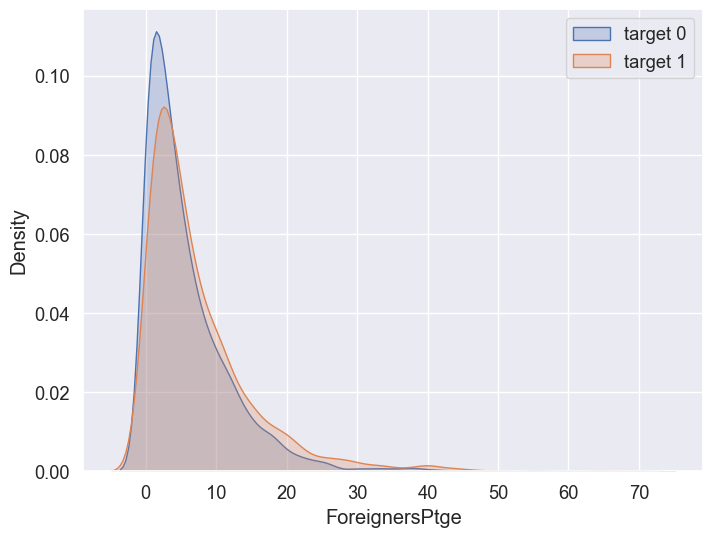

In [68]:
hist_targetbinaria(datos_input['ForeignersPtge'], varObjBin, 'ForeignersPtge')

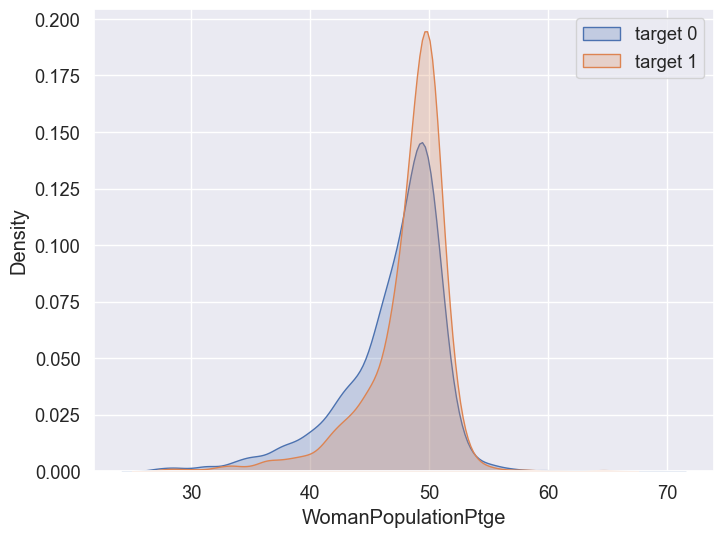

In [69]:
hist_targetbinaria(datos_input['WomanPopulationPtge'], varObjBin, 'WomanPopulationPtge')

In [70]:
# Calcular la matriz de correlación de Pearson entre la variable objetivo continua ('varObjCont') y las variables numéricas
matriz_corr = pd.concat([varObjCont, datos_input[numericas]], axis = 1).corr(method = 'pearson')
matriz_corr

,AbstentionPtge,Population,TotalCensus,Izda_Pct,Dcha_Pct,Otros_Pct,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,...,Industria,Construccion,ComercTTEHosteleria,Servicios,inmuebles,Pob2010,SUPERFICIE,PobChange_pct,PersonasInmueble,Explotaciones
AbstentionPtge,1.000000,0.236183,0.248602,-0.103868,-0.404429,0.224488,0.317555,0.332485,0.168427,-0.285894,...,0.067836,0.060590,0.064157,0.031747,0.065915,0.061519,0.067881,0.190432,0.325694,0.150933
Population,0.236183,1.000000,0.853681,0.074000,-0.189095,0.188952,0.420534,0.476148,0.289253,-0.440519,...,0.073959,0.049486,0.046229,0.021495,0.041227,0.040697,0.106426,0.251383,0.442981,0.314786
TotalCensus,0.248602,0.853681,1.000000,0.086052,-0.192967,0.179766,0.409884,0.467734,0.289905,-0.436072,...,0.085075,0.062115,0.057229,0.034591,0.057865,0.054444,0.113601,0.249597,0.437752,0.353965
Izda_Pct,-0.103868,0.074000,0.086052,1.000000,-0.058605,-0.307082,-0.021331,0.036578,0.082839,-0.067588,...,-0.000465,0.002155,0.004543,-0.004317,0.003978,0.008658,0.193565,-0.005121,-0.008610,0.177484
Dcha_Pct,-0.404429,-0.189095,-0.192967,-0.058605,1.000000,-0.392128,-0.423402,-0.460938,-0.316039,0.448450,...,-0.037584,-0.025556,-0.023208,-0.012111,-0.020125,-0.022055,0.012739,-0.251536,-0.388083,-0.072446
Otros_Pct,0.224488,0.188952,0.179766,-0.307082,-0.392128,1.000000,0.275712,0.277183,0.189643,-0.270515,...,0.095127,0.071401,0.070825,0.048621,0.070396,0.064858,-0.095597,0.167651,0.269206,0.042999
Age_0-4_Ptge,0.317555,0.420534,0.409884,-0.021331,-0.423402,0.275712,1.000000,0.858526,0.468044,-0.765738,...,0.135085,0.102447,0.104231,0.061721,0.103388,0.102260,0.054028,0.548785,0.626522,0.186377
Age_under19_Ptge,0.332485,0.476148,0.467734,0.036578,-0.460938,0.277183,0.858526,1.000000,0.496297,-0.864420,...,0.141619,0.107376,0.110755,0.063834,0.108941,0.108775,0.085030,0.517008,0.698532,0.252054
Age_19_65_pct,0.168427,0.289253,0.289905,0.082839,-0.316039,0.189643,0.468044,0.496297,1.000000,-0.844820,...,0.100636,0.080950,0.084088,0.049977,0.083961,0.081892,0.054706,0.395241,0.446479,0.110410
Age_over65_pct,-0.285894,-0.440519,-0.436072,-0.067588,0.448450,-0.270515,-0.765738,-0.864420,-0.844820,1.000000,...,-0.139157,-0.108107,-0.111804,-0.065344,-0.110813,-0.109421,-0.080885,-0.529449,-0.662526,-0.210442


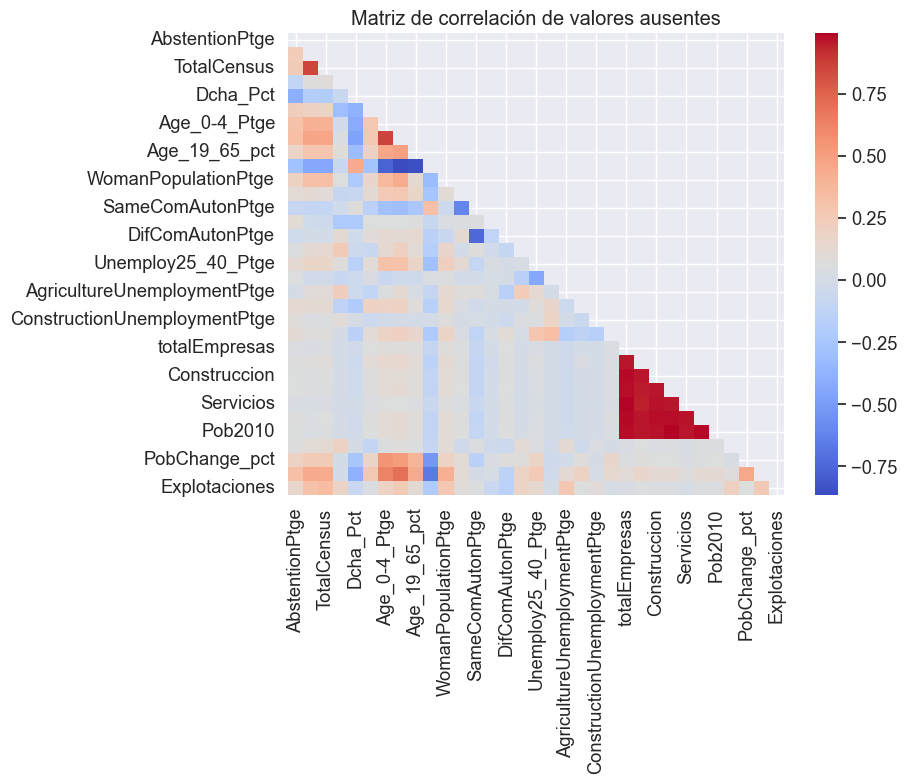

In [71]:
# Crear una máscara para ocultar la mitad superior de la matriz de correlación (triangular superior)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 8x6 pulgadas
plt.figure(figsize=(8, 6))
# Establecer el tamaño de fuente en el gráfico
sns.set(font_scale=1.2)
# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', fmt=".2f", cbar=True, mask=mask)
# Establecer el título del gráfico
plt.title("Matriz de correlación de valores ausentes")
# Mostrar el gráfico de la matriz de correlación
plt.show()

### Vuelo lo que no me importa


In [72]:
numericas = datos_input.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
numericas

Index(['Population', 'TotalCensus', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct',
       'Age_0-4_Ptge', 'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria',
       'Servicios', 'inmuebles', 'Pob2010', 'SUPERFICIE', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones'],
      dtype='object')

In [73]:
[variable for variable in list(datos_input.columns) if variable not in numericas]

['CodigoProvincia',
 'CCAA',
 'Izquierda',
 'Derecha',
 'ActividadPpal',
 'Densidad',
 'prop_missings']

In [74]:
datos_transf = pd.concat([Transf_Auto(datos_input[numericas], varObjCont), Transf_Auto(datos_input[numericas], varObjBin)], axis = 1)

datos_transf


,logxPopulation,logxTotalCensus,raiz4Izda_Pct,xDcha_Pct,logxOtros_Pct,sqrtxAge_0-4_Ptge,xAge_under19_Ptge,xAge_19_65_pct,sqrtxAge_over65_pct,xWomanPopulationPtge,...,xIndustria,xConstruccion,xComercTTEHosteleria,xServicios,xinmuebles,xPob2010,xSUPERFICIE,xPobChange_pct,xPersonasInmueble,xExplotaciones
0,-1.717752,-1.625534,1.383875,1.783000,-2.040868,1.372645,2.677838,3.745855,1.510221,4.219468,...,0.000015,0.000012,0.000012,0.000007,0.008722,0.006711,0.488816,4.839011,2.557049,0.286291
1,-1.470220,-1.366310,1.350245,2.212355,-3.614401,0.891543,1.925651,3.986039,1.606357,5.676196,...,0.000015,0.000012,0.000012,0.000007,0.015605,0.009486,0.680107,3.783412,1.781181,0.699696
2,-1.184972,-0.914678,1.279746,2.664725,-2.650591,0.774012,1.348089,3.711738,1.751494,5.416006,...,0.000015,0.000012,0.000012,0.000007,0.037832,0.013973,0.618413,2.790425,0.899511,0.773897
3,-0.814456,-0.700115,1.325114,2.272875,-9.802984,1.439993,2.207205,4.509925,1.457286,5.910943,...,0.000015,0.000012,0.000012,0.000007,0.024604,0.017478,0.987755,4.240363,2.222015,0.689096
4,-1.093557,-0.967456,1.282336,2.500614,-2.843989,1.311322,2.296435,4.402722,1.460262,5.205021,...,0.000015,0.000012,0.000012,0.000007,0.016103,0.012950,0.434577,4.466641,2.592316,1.007100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,-3.733226,-3.663670,1.319782,2.193903,-1.477107,0.012126,0.602245,4.990445,1.667447,2.464145,...,0.000015,0.000012,0.000012,0.000007,0.002501,0.000930,0.124371,4.501791,1.111112,0.010687
8115,-2.818633,-2.595013,1.034724,3.844386,-1.412683,0.012126,0.769790,2.121732,2.072307,5.335116,...,0.000015,0.000012,0.000012,0.000007,0.005155,0.002329,0.203366,4.407325,1.357979,0.190890
8116,-4.257364,-3.914210,1.109819,3.581749,-1.343726,0.012126,0.000200,4.201659,1.889643,2.938200,...,0.000015,0.000012,0.000012,0.000007,0.002211,0.000659,0.117086,2.976061,0.740811,0.106089
8117,-2.051661,-1.921554,1.232073,3.015008,-2.380323,0.634324,1.645572,4.106586,1.635301,4.953712,...,0.000015,0.000012,0.000012,0.000007,0.011583,0.005250,0.244753,3.900945,1.305079,0.487693


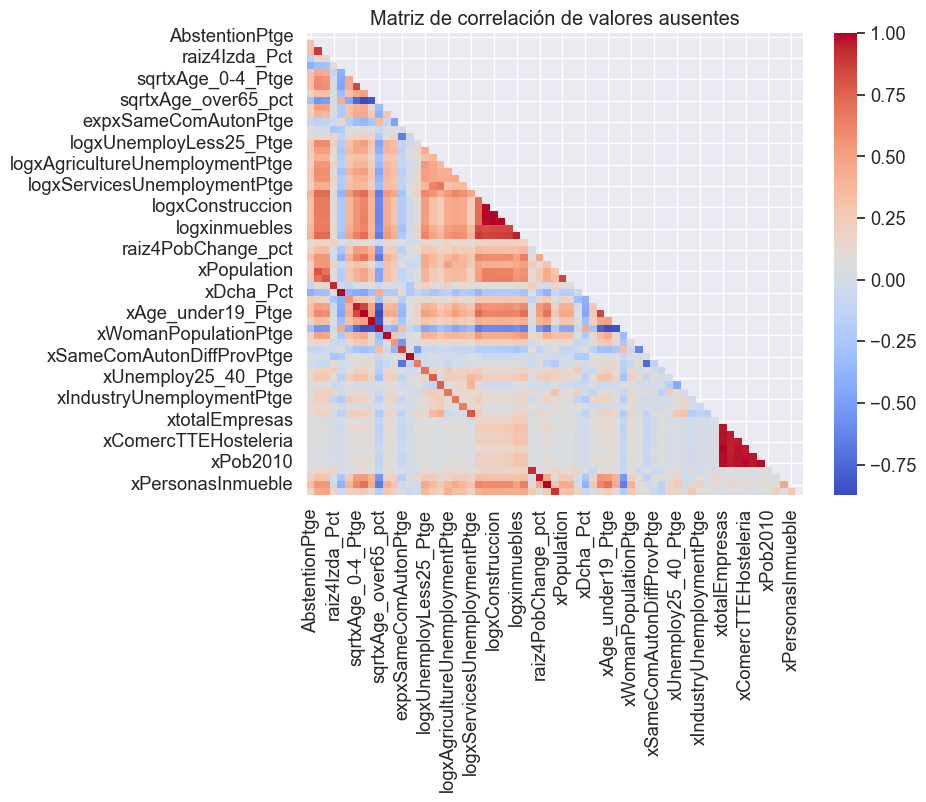

In [75]:

matriz_corr = pd.concat([varObjCont, datos_transf], axis = 1).corr(method = 'pearson')
# Crear una máscara para ocultar la mitad superior de la matriz de correlación (triangular superior)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 8x6 pulgadas
plt.figure(figsize=(8, 6))
# Establecer el tamaño de fuente en el gráfico
sns.set(font_scale=1.2)
# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', fmt=".2f", cbar=True, mask=mask)
# Establecer el título del gráfico
plt.title("Matriz de correlación de valores ausentes")
# Mostrar el gráfico de la matriz de correlación
plt.show()

In [76]:
#datos_input = datos_input.drop(['Construccion', 'Pob2010','totalEmpresas', 'Servicios','SUPERFICIE','ServicesUnemploymentPtge','PobChange_pct', 'Industria', 'ComercTTEHosteleria'], axis = 1)
datos_transf.columns

Index(['logxPopulation', 'logxTotalCensus', 'raiz4Izda_Pct', 'xDcha_Pct',
       'logxOtros_Pct', 'sqrtxAge_0-4_Ptge', 'xAge_under19_Ptge',
       'xAge_19_65_pct', 'sqrtxAge_over65_pct', 'xWomanPopulationPtge',
       'logxForeignersPtge', 'expxSameComAutonPtge',
       'xSameComAutonDiffProvPtge', 'logxDifComAutonPtge',
       'logxUnemployLess25_Ptge', 'logxUnemploy25_40_Ptge',
       'logxUnemployMore40_Ptge', 'logxAgricultureUnemploymentPtge',
       'logxIndustryUnemploymentPtge', 'logxConstructionUnemploymentPtge',
       'logxServicesUnemploymentPtge', 'logxtotalEmpresas', 'logxIndustria',
       'logxConstruccion', 'logxComercTTEHosteleria', 'logxServicios',
       'logxinmuebles', 'logxPob2010', 'sqrtxSUPERFICIE', 'raiz4PobChange_pct',
       'xPersonasInmueble', 'raiz4Explotaciones', 'xPopulation',
       'xTotalCensus', 'xIzda_Pct', 'xDcha_Pct', 'xOtros_Pct', 'xAge_0-4_Ptge',
       'xAge_under19_Ptge', 'xAge_19_65_pct', 'xAge_over65_pct',
       'xWomanPopulationPtge', 'xF

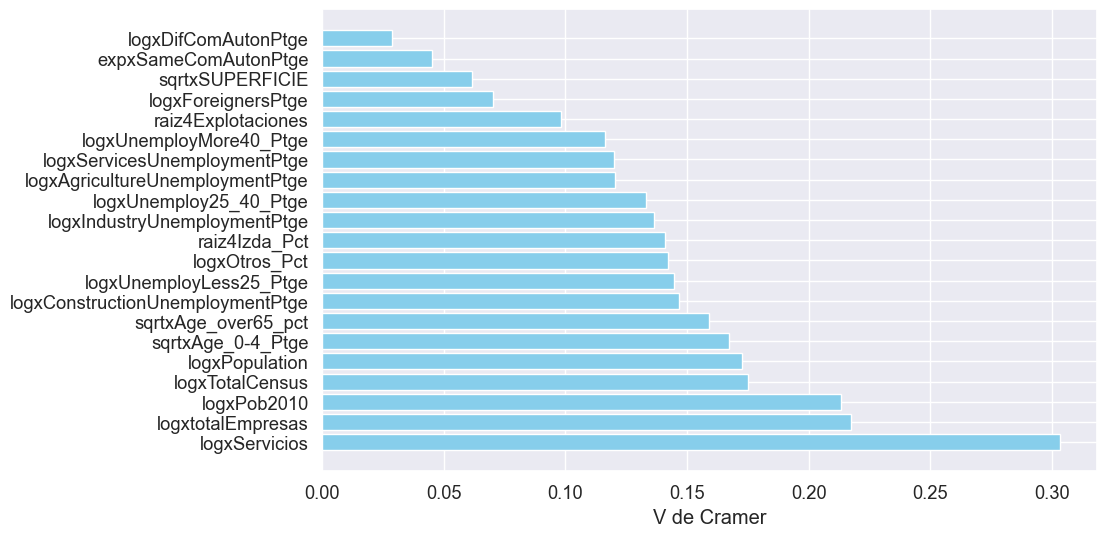

In [77]:

numericas_trans = ['logxPopulation', 'logxTotalCensus', 'raiz4Izda_Pct',
       'logxOtros_Pct', 'sqrtxAge_0-4_Ptge', 
       'sqrtxAge_over65_pct',
       'logxForeignersPtge', 'expxSameComAutonPtge',
       'logxDifComAutonPtge',
       'logxUnemployLess25_Ptge', 'logxUnemploy25_40_Ptge',
       'logxUnemployMore40_Ptge', 'logxAgricultureUnemploymentPtge',
       'logxIndustryUnemploymentPtge', 'logxConstructionUnemploymentPtge',
       'logxServicesUnemploymentPtge', 'logxtotalEmpresas', 'logxServicios',
       'logxPob2010', 'sqrtxSUPERFICIE', 
        'raiz4Explotaciones'
        
      ]

# Vamos a probar un modelo con menos variables. Recuerdo el grafico de Cramer
graficoVcramer(datos_transf[numericas_trans], varObjCont) # Pruebo con las mas importantes


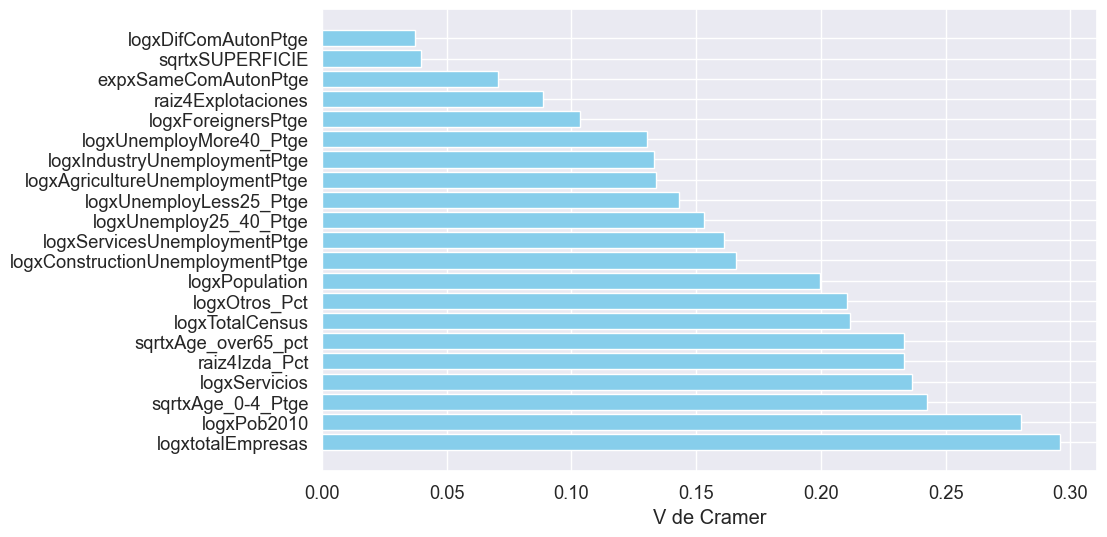

In [78]:

graficoVcramer(datos_transf[numericas_trans], varObjBin) # Pruebo con las mas importantes


In [79]:
datos_input_prev = datos_input
var_cont_prev = datos_input_prev.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
var_bin_prev = [variable for variable in datos_input_prev if variable not in var_cont_prev]
datos_input = pd.concat([datos_input ,datos_transf[['logxServicios', 'logxtotalEmpresas', 'logxPob2010', 'logxPopulation', 'logxTotalCensus', 'sqrtxAge_0-4_Ptge', 'sqrtxAge_over65_pct']]], axis = 1)
datos_input
#datos_input = datos_input.merge(datos_transf[['logxServicios', 'logxtotalEmpresas', 'logxPob2010', 'logxPopulation', 'logxTotalCensus', 'sqrtxAge_0-4_Ptge', 'sqrtxAge_over65_pct']])
#datos_input = datos_input.drop(['logxServicios', 'logxtotalEmpresas', 'logxPob2010', 'logxPopulation', 'logxTotalCensus', 'sqrtxAge_0-4_Ptge', 'sqrtxAge_over65_pct'], axis = 1)
#selected_columns = 
#datos_transf[selected_columns]

,CodigoProvincia,CCAA,Population,TotalCensus,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,...,PersonasInmueble,Explotaciones,prop_missings,logxServicios,logxtotalEmpresas,logxPob2010,logxPopulation,logxTotalCensus,sqrtxAge_0-4_Ptge,sqrtxAge_over65_pct
0,10,Extremadura,336.0,282.0,60.444,35.555,1.778,1,0,3.869,...,1.56,28.0,0.0,-11.849791,-5.636370,-5.004047,-1.717752,-1.625534,1.372645,1.510221
1,10,Extremadura,429.0,364.0,54.779,44.118,0.368,1,0,1.632,...,1.12,67.0,0.0,-11.849791,-5.945562,-4.657925,-1.470220,-1.366310,0.891543,1.606357
2,10,Extremadura,569.0,569.0,44.203,53.140,0.966,0,1,1.230,...,0.62,74.0,0.0,-11.849791,-4.454441,-4.270652,-1.184972,-0.914678,0.774012,1.751494
3,10,Extremadura,822.0,704.0,50.813,45.325,0.000,1,0,4.258,...,1.37,66.0,0.0,-11.849791,-4.434254,-4.046788,-0.814456,-0.700115,1.439993,1.457286
4,10,Extremadura,623.0,540.0,44.562,49.867,0.796,0,1,3.531,...,1.58,96.0,0.0,-11.849791,-5.254222,-4.346648,-1.093557,-0.967456,1.311322,1.460262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,9,CastillaLeón,49.0,41.0,50.000,43.750,3.125,1,0,0.000,...,0.74,2.0,0.02631578947368421,-11.849791,-11.569674,-6.979900,-3.733226,-3.663670,0.012126,1.667447
8115,9,CastillaLeón,115.0,110.0,18.889,76.667,3.333,0,1,0.000,...,0.88,19.0,0.0,-11.849791,-11.569674,-6.062519,-2.818633,-2.595013,0.012126,2.072307
8116,9,CastillaLeón,31.0,33.0,25.000,71.429,3.571,0,1,0.000,...,0.53,11.0,0.0,-11.849791,-11.569674,-7.324609,-4.257364,-3.914210,0.012126,1.889643
8117,9,CastillaLeón,242.0,211.0,37.975,60.126,1.266,0,1,0.826,...,0.85,47.0,0.0,-11.849791,-5.779064,-5.249528,-2.051661,-1.921554,0.634324,1.635301


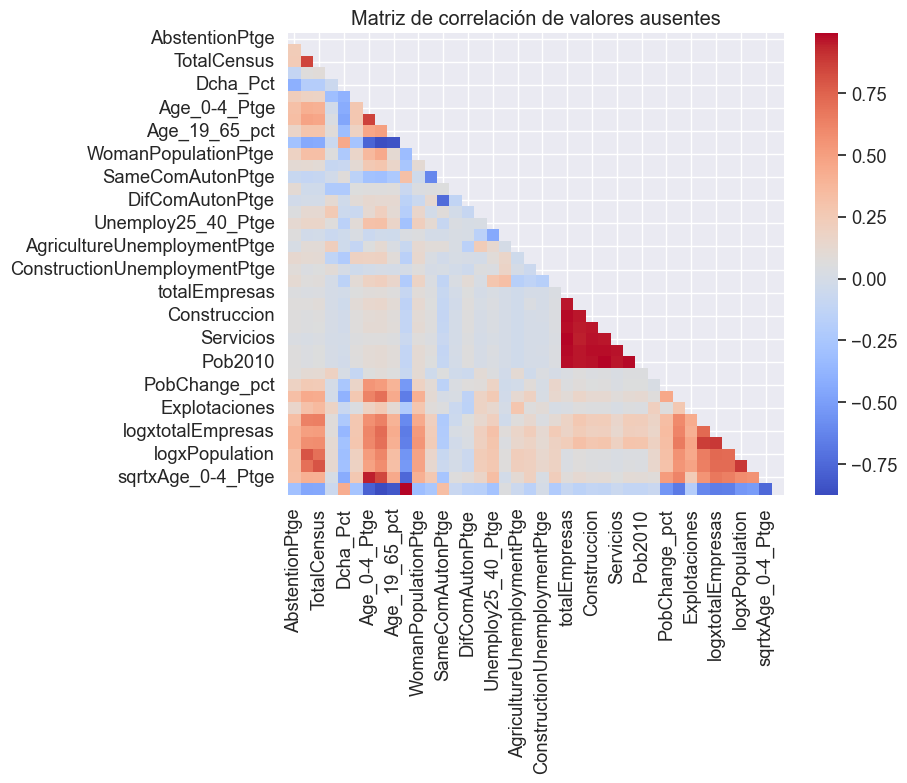

In [80]:
numericas = datos_input.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
matriz_corr = pd.concat([varObjCont, datos_input[numericas]], axis = 1).corr(method = 'pearson')
# Crear una máscara para ocultar la mitad superior de la matriz de correlación (triangular superior)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 8x6 pulgadas
plt.figure(figsize=(8, 6))
# Establecer el tamaño de fuente en el gráfico
sns.set(font_scale=1.2)
# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', fmt=".2f", cbar=True, mask=mask)
# Establecer el título del gráfico
plt.title("Matriz de correlación de valores ausentes")
# Mostrar el gráfico de la matriz de correlación
plt.show()

In [81]:
datos_input = datos_input.drop(['Industria','ComercTTEHosteleria','Construccion', 'inmuebles'], axis = 1)

In [82]:
### Comenzamos con la regresion lineal

# Obtengo la particion
#separo los segmentos que van a ser test y que van a entrenar
x_train, x_test, y_train, y_test = train_test_split(datos_input, np.ravel(varObjCont), test_size = 0.2, random_state = 123456)

# Construyo un modelo preliminar con todas las variables (originales)
# Indico la tipología de las variables (numéricas o categóricas)

var_cont1 = [
              'Izda_Pct', 
              'Dcha_Pct', 
              'Otros_Pct', 
              'Age_0-4_Ptge',
              'Age_under19_Ptge', 
              'Age_19_65_pct', 
              'Age_over65_pct',
              'WomanPopulationPtge', 
              'ForeignersPtge', 
              'SameComAutonPtge',
              'SameComAutonDiffProvPtge',
              'DifComAutonPtge', 
              'UnemployLess25_Ptge',
              'Unemploy25_40_Ptge', 
              'UnemployMore40_Ptge',
              'AgricultureUnemploymentPtge', 
              'IndustryUnemploymentPtge',
              'ConstructionUnemploymentPtge',
              'Population', 
              'Explotaciones',
              'logxServicios', 
              'logxtotalEmpresas', 
              'logxPob2010', 
              'logxPopulation', 
              'logxTotalCensus', 
              'sqrtxAge_0-4_Ptge', 
              'sqrtxAge_over65_pct'
              ]
#numericas
var_categ1 = ['CCAA',
            'CodigoProvincia',
            'Izquierda',
            'Derecha',
            'ActividadPpal',
            'Densidad',
 #'PersonasInmuebleCate',
 #'prop_missings'
 ]#[variable for variable in list(datos_input.columns) if variable not in var_cont1]#, 'Derecha', 'ActividadPpal', 'Densidad', 'PersonasInmuebleCate', 'AbstentionPtgeCate']

#var_cont1 = numericas
#var_categ1 = ['CCAA', 'Izquierda', 'Derecha', 'ActividadPpal', 'Densidad', 'PersonasInmuebleCate', 'AbstentionPtgeCate']#[variable for variable in list(datos_input.columns) if variable not in var_cont1]

In [83]:
var_cont1

['Izda_Pct',
 'Dcha_Pct',
 'Otros_Pct',
 'Age_0-4_Ptge',
 'Age_under19_Ptge',
 'Age_19_65_pct',
 'Age_over65_pct',
 'WomanPopulationPtge',
 'ForeignersPtge',
 'SameComAutonPtge',
 'SameComAutonDiffProvPtge',
 'DifComAutonPtge',
 'UnemployLess25_Ptge',
 'Unemploy25_40_Ptge',
 'UnemployMore40_Ptge',
 'AgricultureUnemploymentPtge',
 'IndustryUnemploymentPtge',
 'ConstructionUnemploymentPtge',
 'Population',
 'Explotaciones',
 'logxServicios',
 'logxtotalEmpresas',
 'logxPob2010',
 'logxPopulation',
 'logxTotalCensus',
 'sqrtxAge_0-4_Ptge',
 'sqrtxAge_over65_pct']

In [84]:
var_categ1
#datos_input.dtypes

['CCAA',
 'CodigoProvincia',
 'Izquierda',
 'Derecha',
 'ActividadPpal',
 'Densidad']

In [85]:
#datos_input = pd.get_dummies(datos_input, columns=['PersonasInmuebleCate', 'CCAA', 'Izquierda', 'Derecha', 'ActividadPpal', 'Densidad', 'AbstentionPtgeCate', 'ForeignersPtgeCate', 'WomanPopulationPtgeCate','ForeignersPtgeCate','UnemployLess25_PtgeCate','Unemploy25_40_PtgeCate','UnemployMore40_PtgeCate','AgricultureUnemploymentPtgeCate','IndustryUnemploymentPtgeCate','ConstructionUnemploymentPtgeCate','ServicesUnemploymentPtgeCate','Age_under19_PtgeCate','Izda_PctCate','Dcha_PctCate','Otros_PctCate','Age_19_65_pctCate','Age_over65_pctCate'], drop_first=True)
#datos_input

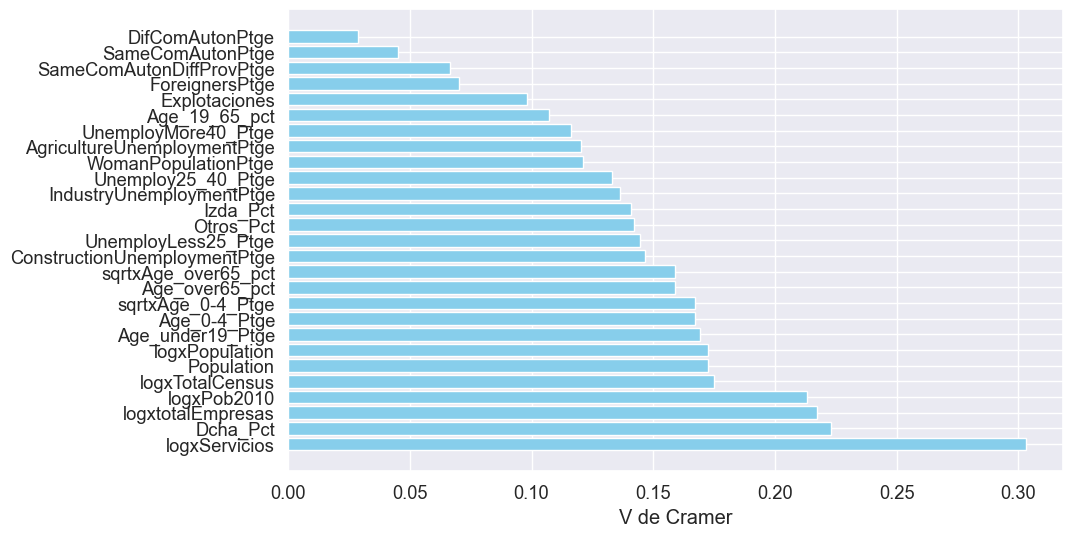

In [86]:
graficoVcramer(datos_input[var_cont1], varObjCont) # Pruebo con las mas importantes

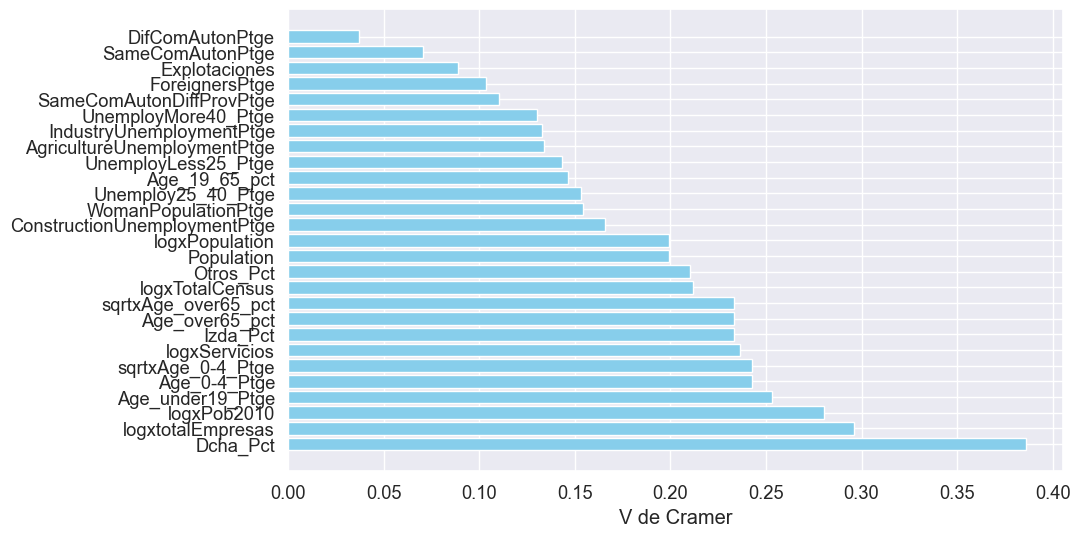

In [87]:
graficoVcramer(datos_input[var_cont1], varObjBin) # Pruebo con las mas importantes

In [88]:
# Seleccion de variables Stepwise, métrica AIC
modeloStepAIC = lm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'AIC')
# Resumen del modelo
#modeloStepAIC['Modelo'].summary()

# Preparo datos test
x_test_modeloStepAIC = crear_data_modelo(x_test, modeloStepAIC['Variables']['cont'], 
                                                modeloStepAIC['Variables']['categ'], 
                                                modeloStepAIC['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepAIC['Modelo'], y_test, x_test_modeloStepAIC)

Start: AIC = 44651.91381582335

y ~ 1

                       Variable          AIC
              + CodigoProvincia 41760.088772
                         + CCAA 42275.792243
                     + Dcha_Pct 43500.128217
                  + logxPob2010 43502.126091
            + logxtotalEmpresas 43533.037723
              + logxTotalCensus 43846.641237
               + logxPopulation 43889.421797
                + logxServicios 43889.760883
             + Age_under19_Ptge 43893.220488
            + sqrtxAge_0-4_Ptge 43934.927716
                      + Derecha 43946.413783
                + ActividadPpal 43961.092942
                 + Age_0-4_Ptge 43980.648758
          + sqrtxAge_over65_pct 44090.760770
               + Age_over65_pct 44111.116459
                     + Densidad 44252.322710
                   + Population 44271.524561
                    + Otros_Pct 44326.892663
          + WomanPopulationPtge 44385.781120
                + Age_19_65_pct 44477.513140
                

KeyboardInterrupt: 

In [ ]:
modeloBackAIC = lm_backward(y_train, x_train, var_cont1, var_categ1, [], 'AIC')
modeloBackAIC['Modelo'].summary()
x_test_modeloBackAIC = crear_data_modelo(x_test, modeloBackAIC['Variables']['cont'], 
                                                modeloBackAIC['Variables']['categ'], 
                                                modeloBackAIC['Variables']['inter'])
Rsq(modeloBackAIC['Modelo'], y_test, x_test_modeloBackAIC)

In [ ]:
# Comparo número de parámetros (iguales)
[len(modeloStepAIC['Modelo'].params), len(modeloBackAIC['Modelo'].params)]

In [ ]:
# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC = lm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'BIC')
# Resumen del modelo
modeloStepBIC['Modelo'].summary()
# Preparo datos test
x_test_modeloStepBIC = crear_data_modelo(x_test, modeloStepBIC['Variables']['cont'], 
                                                modeloStepBIC['Variables']['categ'], 
                                                modeloStepBIC['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepBIC['Modelo'], y_test, x_test_modeloStepBIC)

In [ ]:
# Seleccion de variables Backward, métrica BIC
modeloBackBIC = lm_backward(y_train, x_train, var_cont1, var_categ1, [], 'BIC')
# Resumen del modelo
modeloBackBIC['Modelo'].summary()
# Preparo datos test
x_test_modeloBackBIC = crear_data_modelo(x_test, modeloBackBIC['Variables']['cont'], 
                                                modeloBackBIC['Variables']['categ'], 
                                                modeloBackBIC['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloBackBIC['Modelo'], y_test, x_test_modeloBackBIC)


In [ ]:
[len(modeloStepBIC['Modelo'].params), len(modeloBackBIC['Modelo'].params)]

In [90]:
interacciones = var_cont1 + var_categ1
interacciones_unicas = list(itertools.combinations(interacciones, 2)) 
# Seleccion de variables Stepwise, métrica AIC, con interacciones
modeloStepAIC_int = lm_stepwise(y_train, x_train, var_cont1, var_categ1, 
                                interacciones_unicas[:100], 'AIC')
# Resumen del modelo
modeloStepAIC_int['Modelo'].summary()

# Preparo datos test
x_test_modeloStepAIC_int = crear_data_modelo(x_test, modeloStepAIC_int['Variables']['cont'], 
                                                    modeloStepAIC_int['Variables']['categ'], 
                                                    modeloStepAIC_int['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepAIC_int['Modelo'], y_test, x_test_modeloStepAIC_int)

Start: AIC = 44651.91381582335

y ~ 1

                                        Variable          AIC
                               + CodigoProvincia 41760.088772
               + ('Dcha_Pct', 'CodigoProvincia') 41949.500076
               + ('Izda_Pct', 'CodigoProvincia') 42229.208980
                                          + CCAA 42275.792243
                          + ('Dcha_Pct', 'CCAA') 42361.796766
                          + ('Izda_Pct', 'CCAA') 42727.562860
                   + ('Dcha_Pct', 'logxPob2010') 42946.887645
                 + ('Dcha_Pct', 'logxServicios') 43166.513275
              + ('Otros_Pct', 'CodigoProvincia') 43179.425536
             + ('Dcha_Pct', 'logxtotalEmpresas') 43261.105254
                 + ('Dcha_Pct', 'ActividadPpal') 43375.770349
                      + ('Dcha_Pct', 'Densidad') 43416.073088
                                      + Dcha_Pct 43500.128217
                                   + logxPob2010 43502.126091
               + ('Dcha_Pct', '

KeyboardInterrupt: 

In [ ]:
Rsq(modeloStepAIC_int['Modelo'], y_test, x_test_modeloStepAIC_int)

In [93]:
# Seleccion de variables Stepwise, métrica BIC, con interacciones
modeloStepBIC_int = lm_stepwise(y_train, x_train, var_cont1, var_categ1,
                                interacciones_unicas[:20], 'BIC')
# Resumen del modelo
modeloStepBIC_int['Modelo'].summary()
#### te da el r2 del modelo
Rsq(modeloStepBIC_int['Modelo'], y_train, modeloStepBIC_int['X'])

# Preparo datos test
x_test_modeloStepBIC_int = crear_data_modelo(x_test, modeloStepBIC_int['Variables']['cont'], 
                                                    modeloStepBIC_int['Variables']['categ'], 
                                                    modeloStepBIC_int['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepBIC_int['Modelo'], y_test, x_test_modeloStepBIC_int)

Start: BIC = 44658.69260375245

y ~ 1

                                       Variable          BIC
                              + CodigoProvincia 42099.028168
                                         + CCAA 42391.031638
                                     + Dcha_Pct 43513.685793
                                  + logxPob2010 43515.683667
                            + logxtotalEmpresas 43546.595299
                              + logxTotalCensus 43860.198813
                               + logxPopulation 43902.979373
                                + logxServicios 43903.318459
                             + Age_under19_Ptge 43906.778064
                            + sqrtxAge_0-4_Ptge 43948.485292
                                      + Derecha 43959.971358
                                + ActividadPpal 43981.429305
                                 + Age_0-4_Ptge 43994.206334
                + ('Izda_Pct', 'logxServicios') 43997.633539
                     + ('Izda_Pct', 'Dcha_Pct'

0.4441147556412791

In [94]:
modeloStepBIC_int['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     86.47
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:44:58   Log-Likelihood:                -20356.
No. Observations:                6495   AIC:                         4.084e+04
Df Residuals:                    6432   BIC:                         4.127e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             51.3431      1.944     26.415      0.000      47.533      55.153
logxPob2010                                        2.1125      0.105     20.032      0.000       1.906       2.319
SameComAutonPtge                                  -0.0786      0.008     -9.829      0.000      -0.094      -0.063
Age_over65_pct                                     0.3920      0.051      7.637      0.000       0.291       0.493
sqrtxAge_over65_pct                              -11.4224      1.885     -6.058      0.000     -15.118      -7.726
logxServicios                                     -0.8676      0.114     -7.612      0.000      -1.091      -0.644
SameComAutonDiffProvPtge                          -0.0869      0.020     -4.415      0.000      -0.125      -0.048
Dcha_Pct                                          -0.0883      0.011     -7.994      0.000      -0.110      -0.067
CodigoProvincia_10                                 2.2931      1.220      1.879      0.060      -0.099       4.685
CodigoProvincia_11                                 7.8979      1.480      5.338      0.000       4.997      10.799
CodigoProvincia_12                                -5.5420      1.138     -4.870      0.000      -7.773      -3.311
CodigoProvincia_13                                -0.0561      1.293     -0.043      0.965      -2.591       2.479
CodigoProvincia_14                                 0.5763      1.361      0.424      0.672      -2.091       3.243
CodigoProvincia_15                                 3.5640      1.226      2.906      0.004       1.160       5.968
CodigoProvincia_16                                -1.3119      1.197     -1.096      0.273      -3.659       1.036
CodigoProvincia_17                                 3.8842      1.136      3.420      0.001       1.658       6.111
CodigoProvincia_18                                 3.9143      1.243      3.148      0.002       1.477       6.352
CodigoProvincia_19                                -2.7855      1.189     -2.343      0.019      -5.116      -0.455
CodigoProvincia_2                                 -1.8452      1.319     -1.398      0.162      -4.432       0.741
CodigoProvincia_20                                 5.0063      1.166      4.295      0.000       2.721       7.291
CodigoProvincia_21                                 8.1473      1.346      6.051      0.000       5.508      10.787
CodigoProvincia_22                                 3.0935      1.203      2.571      0.010       0.735       5.452
CodigoProvincia_23                                -0.0740      1.336     -0.055      0.956      -2.692       2.544
CodigoProvincia_24                                 3.4543      1.206      2.863      0.004   

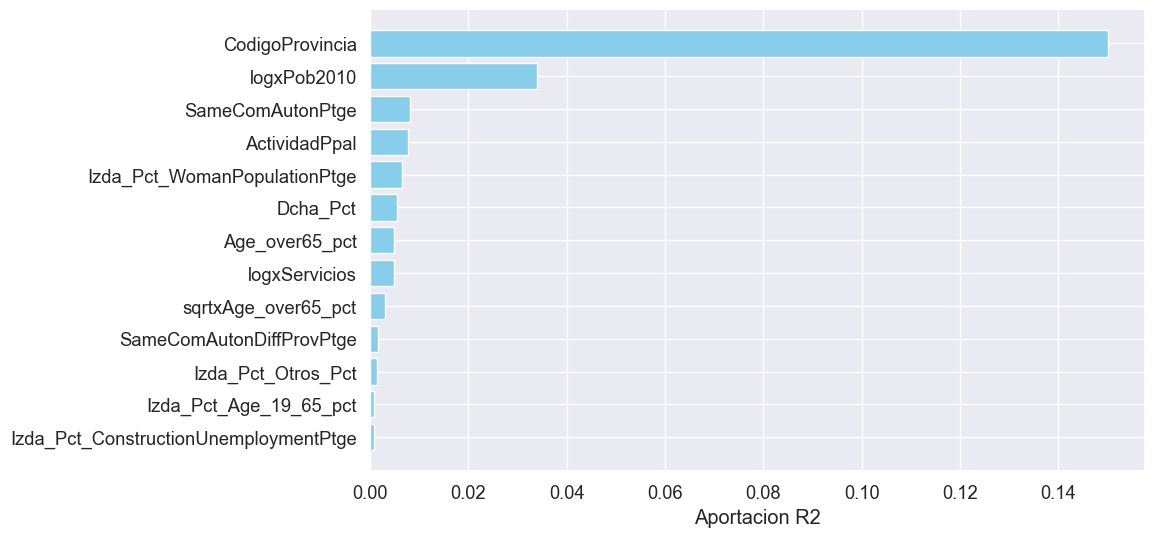

,Variables,R2
12,Izda_Pct_ConstructionUnemploymentPtge,0.000794
11,Izda_Pct_Age_19_65_pct,0.000845
10,Izda_Pct_Otros_Pct,0.001353
5,SameComAutonDiffProvPtge,0.001653
3,sqrtxAge_over65_pct,0.003112
4,logxServicios,0.004913
2,Age_over65_pct,0.004946
6,Dcha_Pct,0.005418
9,Izda_Pct_WomanPopulationPtge,0.006478
8,ActividadPpal,0.007759


In [95]:
modelEffectSizes(modeloStepBIC_int, y_train, x_train, modeloStepBIC_int['Variables']['cont'], modeloStepBIC_int['Variables']['categ'], modeloStepBIC_int['Variables']['inter'])

In [ ]:
[len(modeloStepAIC_int['Modelo'].params), len(modeloStepBIC_int['Modelo'].params)]

In [ ]:
variables_seleccionadas = {
    'Formula': [],
    'Variables': []
}

# Realizar 30 iteraciones de selección aleatoria.
for x in range(10):
    print('---------------------------- iter: ' + str(x))
    
    # Dividir los datos de entrenamiento en conjuntos de entrenamiento y prueba.
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, 
                                                            test_size = 0.2, random_state = 1234567 + x)
    
    # Realizar la selección stepwise utilizando el criterio BIC en la submuestra.
    modelo = lm_stepwise(y_train2.astype(int), x_train2, var_cont1, var_categ1, interacciones_unicas[:100], 'BIC')
    
    # Almacenar las variables seleccionadas y la fórmula correspondiente.
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['Modelo'].model.exog_names))

# Unir las variables en las fórmulas seleccionadas en una sola cadena.
variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))
variables_seleccionadas

In [ ]:
# Calcular la frecuencia de cada fórmula y ordenarlas por frecuencia.
frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

# Identificar las tres fórmulas más frecuentes y las variables correspondientes.
var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
var_3 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]

In [ ]:
# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)

for rep in range(20):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas

    modelo_stepAIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC['Variables']['cont']
        , modeloStepAIC['Variables']['categ']
    )
    modelo_backAIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackAIC['Variables']['cont']
        , modeloBackAIC['Variables']['categ']
    )
    modelo_stepBIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC['Variables']['cont']
        , modeloStepBIC['Variables']['categ']
    )
    modelo_backBIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackBIC['Variables']['cont']
        , modeloBackBIC['Variables']['categ']
    )
    modelo_stepAIC_int = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC_int['Variables']['cont']
        , modeloStepAIC_int['Variables']['categ']
    )
    modelo_stepBIC_int = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_int['Variables']['cont']
        , modeloStepBIC_int['Variables']['categ']
        , modeloStepBIC_int['Variables']['inter']
    )
    modelo_aleatorio1 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo_aleatorio2 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    modelo_aleatorio3 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_3['cont']
        , var_3['categ']
        , var_3['inter']
    )
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición

    results_rep = pd.DataFrame({
        'Rsquared': modelo_stepAIC + modelo_backAIC + modelo_stepBIC + modelo_backBIC + modelo_stepAIC_int + modelo_stepBIC_int + modelo_aleatorio1 + modelo_aleatorio2 + modelo_aleatorio3
        , 'Resample': ['Rep' + str((rep + 1))]*5*9 # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5 + [7]*5 + [8]*5 + [9]*5# Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)
results

In [ ]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de Rsquared por modelo
grupo_metrica = results.groupby('Modelo')['Rsquared']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  

In [ ]:
# Calcular la media de las métricas R-squared por modelo
media_r2 = results.groupby('Modelo')['Rsquared'].mean()
media_r2

In [ ]:
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2 = results.groupby('Modelo')['Rsquared'].std()
std_r2

In [ ]:
# Contar el número de parámetros en cada modelo
num_params = [len(modeloStepAIC['Modelo'].params), len(modeloBackAIC['Modelo'].params), len(modeloStepBIC['Modelo'].params), 
 len(modeloBackBIC['Modelo'].params), len(modeloStepAIC_int['Modelo'].params), 
 len(modeloStepBIC_int['Modelo'].params)]
num_params

In [ ]:
modeloStepBIC_int['Variables']['cont']

In [ ]:
modeloStepBIC_int['Variables']['categ']

In [ ]:
modeloStepBIC_int['Variables']['inter']

In [ ]:
var_1

In [ ]:

modelox = lm(y_train, x_train, var_3['cont'], var_3['categ'], var_3['inter'])
# Calculamos la medida de ajuste R^2 para los datos de entrenamiento
Rsq(modelox['Modelo'], y_train, modelox['X'])

In [ ]:
len(modelox['Modelo'].params)

In [ ]:
# Creo el modelo
modelo1 = lm(y_train, x_train, var_cont1, var_categ1)
# Visualizamos los resultado del modelo
modelo1['Modelo'].summary()

In [ ]:
# Calculamos la medida de ajuste R^2 para los datos de entrenamiento
Rsq(modelo1['Modelo'], y_train, modelo1['X'])

In [ ]:
# Preparamos los datos test para usar en el modelo
x_test_modelo1 = crear_data_modelo(x_test, var_cont1, var_categ1)
x_test_modelo1
# Calculamos la medida de ajuste R^2 para los datos test
Rsq(modelo1['Modelo'], y_test, x_test_modelo1)

In [ ]:
# Nos fijamos en la importancia de las variables
modelEffectSizes(modelo1, y_train, x_train, var_cont1, var_categ1)

In [ ]:
# Vamos a probar un modelo con menos variables. Recuerdo el grafico de Cramer
graficoVcramer(datos_input, varObjCont) # Pruebo con las mas importantes

In [ ]:

# Construyo el segundo modelo
var_cont2 = ['SameComAutonPtge']
var_categ2 = ['CodigoProvincia', 'ActividadPpal']
modelo2 = lm(y_train, x_train, var_cont2, var_categ2)
modelEffectSizes(modelo2, y_train, x_train, var_cont2, var_categ2)

In [ ]:
Rsq(modelo2['Modelo'], y_train, modelo2['X'])

In [ ]:
x_test_modelo2 = crear_data_modelo(x_test, var_cont2, var_categ2)
Rsq(modelo2['Modelo'], y_test, x_test_modelo2)

In [ ]:
# Pruebo un modelo con menos variables, basandome en la importancia de las variables
var_cont3 = []
var_categ3 = ['CodigoProvincia']
modelo3 = lm(y_train, x_train, var_cont3, var_categ3)
modelo3['Modelo'].summary()
Rsq(modelo3['Modelo'], y_train, modelo3['X'])

In [ ]:
x_test_modelo3 = crear_data_modelo(x_test, var_cont3, var_categ3)
Rsq(modelo3['Modelo'], y_test, x_test_modelo3)

In [ ]:
# Pruebo con una interaccion sobre el anterior
# Se podrian probar todas las interacciones dos a dos
var_cont4 = []
var_categ4 = ['CodigoProvincia', 'ActividadPpal']
var_interac4 = [('CodigoProvincia', 'ActividadPpal')]
modelo4 = lm(y_train, x_train, var_cont4, var_categ4, var_interac4)
modelo4['Modelo'].summary()
Rsq(modelo4['Modelo'], y_train, modelo4['X'])

In [ ]:
x_test_modelo4 = crear_data_modelo(x_test, var_cont4, var_categ4, var_interac4)
Rsq(modelo4['Modelo'], y_test, x_test_modelo4)

In [ ]:
# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'Rsquared': [],
    'Resample': [],
    'Modelo': []
})

# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)
for rep in range(20):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas
    modelo1VC = validacion_cruzada_lm(5, x_train, y_train, var_cont1, var_categ1)
    modelo2VC = validacion_cruzada_lm(5, x_train, y_train, var_cont2, var_categ2)
    modelo3VC = validacion_cruzada_lm(5, x_train, y_train, var_cont3, var_categ3)
    #modelo4VC = validacion_cruzada_lm(5, x_train, y_train, var_cont4, var_categ4, var_interac4)
    
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición
    results_rep = pd.DataFrame({
        'Rsquared': modelo1VC + modelo2VC + modelo3VC, #+ modelo4VC,
        'Resample': ['Rep' + str((rep + 1))] * 5 * 3,  # Etiqueta de repetición
        'Modelo': [1] * 5 + [2] * 5 + [3] * 5  # Etiqueta de modelo (1, 2, 3 o 4)
    })
    
    # Concatena los resultados de esta repetición al DataFrame principal 'results'
    results = pd.concat([results, results_rep], axis=0)
results

In [ ]:
# Boxplot de la validación cruzada
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráfico
# Agrupa los valores de R-squared por modelo
grupo_metrica = results.groupby('Modelo')['Rsquared']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico 

In [ ]:

# Calcular la media de las métricas R-squared por modelo
media_r2 = results.groupby('Modelo')['Rsquared'].mean()
media_r2

In [ ]:
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2 = results.groupby('Modelo')['Rsquared'].std()
std_r2

In [ ]:
# Contar el número de parámetros en cada modelo
num_params = [len(modelo1['Modelo'].params), len(modelo2['Modelo'].params), 
             len(modelo3['Modelo'].params), len(modelo4['Modelo'].params)]
num_params


In [ ]:

# Vemos las variables mas importantes del modelo ganador
modelEffectSizes(modelo3, y_train, x_train, var_cont2, var_categ2)

In [ ]:
# Veo el reparto original. Compruebo que la variable objetivo tome valor 1 para el evento y 0 para el no evento
pd.DataFrame({
    'n': varObjBin.value_counts()
    , '%': varObjBin.value_counts(normalize = True)
})


In [ ]:
[var_cont1, var_categ1]

In [ ]:
# Obtengo la particion
x_train, x_test, y_train, y_test = train_test_split(datos_input, varObjBin, test_size = 0.2, random_state = 1234567)
# Indico que la variable respuesta es numérica (hay que introducirla en el algoritmo de phython tal y como la va a tratar)
y_train, y_test = y_train.astype(int), y_test.astype(int)
[y_train, y_test]

In [ ]:

var_cont1

In [ ]:
# Obtengo la particion
x_train, x_test, y_train, y_test = train_test_split(datos_input, varObjBin, test_size = 0.2, random_state = 1234567)
# Indico que la variable respuesta es numérica (hay que introducirla en el algoritmo de phython tal y como la va a tratar)
y_train, y_test = y_train.astype(int), y_test.astype(int)
[y_train, y_test]
# Seleccion de variables Stepwise, variables originales sin transformar y sin interacciones, métrica AIC
modeloStepAIC = glm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'AIC')
# Resumen del modelo
summary_glm(modeloStepAIC['Modelo'], y_train, modeloStepAIC['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepAIC['Modelo'], modeloStepAIC['X'], y_train)
# Preparo datos test
x_test_modeloStepAIC = crear_data_modelo(x_test, modeloStepAIC['Variables']['cont'], 
                                                modeloStepAIC['Variables']['categ'], 
                                                modeloStepAIC['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepAIC['Modelo'], x_test_modeloStepAIC, y_test)

In [ ]:
# Seleccion de variables Backward, variables originales sin transformar y sin interacciones, métrica AIC
modeloBackAIC = glm_backward(y_train, x_train,  var_cont1, var_categ1, [], 'AIC')
# Resumen del modelo
summary_glm(modeloBackAIC['Modelo'], y_train, modeloBackAIC['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloBackAIC['Modelo'], modeloBackAIC['X'], y_train)
# Preparo datos test
x_test_modeloBackAIC = crear_data_modelo(x_test, modeloBackAIC['Variables']['cont'], 
                                                modeloBackAIC['Variables']['categ'], 
                                                modeloBackAIC['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloBackAIC['Modelo'], x_test_modeloBackAIC, y_test)

In [ ]:
# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC = glm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'BIC')
# Resumen del modelo
summary_glm(modeloStepBIC['Modelo'], y_train, modeloStepBIC['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepBIC['Modelo'], modeloStepBIC['X'], y_train)
# Preparo datos test
x_test_modeloStepBIC = crear_data_modelo(x_test, modeloStepBIC['Variables']['cont'], 
                                                modeloStepBIC['Variables']['categ'], 
                                                modeloStepBIC['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepBIC['Modelo'], x_test_modeloStepBIC, y_test)

In [ ]:
# Seleccion de variables Backward, métrica BIC
modeloBackBIC = glm_backward(y_train, x_train, var_cont1, var_categ1, [], 'BIC')
# Resumen del modelo
summary_glm(modeloBackBIC['Modelo'], y_train, modeloBackBIC['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloBackBIC['Modelo'], modeloBackBIC['X'], y_train)
# Preparo datos test
x_test_modeloBackBIC = crear_data_modelo(x_test, modeloBackBIC['Variables']['cont'], 
                                                modeloBackBIC['Variables']['categ'], 
                                                modeloBackBIC['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloBackBIC['Modelo'], x_test_modeloBackBIC, y_test)

In [ ]:
# Interacciones 2 a 2 de todas las variables continuas (sin transformar) con categoricas
interacciones = list(itertools.product(var_cont1, var_categ1))    
interacciones_unicas = []
for x in interacciones:
    if (sorted(x) not in [sorted(t) for t in interacciones_unicas[:3]]) and (x[0] != x[1]):
        interacciones_unicas.append(x)
  
# Seleccion de variables Stepwise, métrica AIC, con interacciones
modeloStepAIC_int = glm_stepwise(y_train, x_train, var_cont1, var_categ1, 
                                interacciones_unicas[:3], 'AIC')
# Resumen del modelo
summary_glm(modeloStepAIC_int['Modelo'], y_train, modeloStepAIC_int['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepAIC_int['Modelo'], modeloStepAIC_int['X'], y_train)
# Preparo datos test
x_test_modeloStepAIC_int = crear_data_modelo(x_test, modeloStepAIC_int['Variables']['cont'], 
                                                modeloStepAIC_int['Variables']['categ'], 
                                                modeloStepAIC_int['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepAIC_int['Modelo'], x_test_modeloStepAIC_int, y_test)

In [ ]:
# Interacciones 2 a 2 de todas las variables continuas (sin transformar) con categoricas
interacciones = list(itertools.product(var_cont1, var_categ1))    
interacciones_unicas = []
for x in interacciones:
    if (sorted(x) not in [sorted(t) for t in interacciones_unicas[:3]]) and (x[0] != x[1]):
        interacciones_unicas.append(x)
  
# Seleccion de variables Stepwise, métrica AIC, con interacciones
modeloStepBIC_int = glm_stepwise(y_train, x_train, var_cont1, var_categ1, 
                                interacciones_unicas[:3], 'BIC')
# Resumen del modelo
summary_glm(modeloStepBIC_int['Modelo'], y_train, modeloStepBIC_int['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepBIC_int['Modelo'], modeloStepBIC_int['X'], y_train)
# Preparo datos test
x_test_modeloStepBIC_int = crear_data_modelo(x_test, modeloStepBIC_int['Variables']['cont'], 
                                                modeloStepBIC_int['Variables']['categ'], 
                                                modeloStepBIC_int['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepBIC_int['Modelo'], x_test_modeloStepBIC_int, y_test)

In [ ]:
# Inicializar un diccionario para almacenar las fórmulas y variables seleccionadas.
variables_seleccionadas = {
    'Formula': [],
    'Variables': [],
    'Interaccion': []
}

# Realizar 20 iteraciones de selección aleatoria. (en clase no se puede correr con 20)
for x in range(5):
    print('---------------------------- iter: ' + str(x))
    
    # Dividir los datos de entrenamiento en conjuntos de entrenamiento y prueba.
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, 
                                                            test_size = 0.2, random_state = 1234567 + x)
    
    # Realizar la selección stepwise utilizando el criterio BIC en la submuestra.
    modelo = glm_stepwise(y_train2.astype(int), x_train2, var_cont1, var_categ1, interacciones_unicas[:5], 'BIC')
    
    # Almacenar las variables seleccionadas y la fórmula correspondiente.
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['X'].columns))
# Unir las variables en las fórmulas seleccionadas en una sola cadena.
variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))
    
# Calcular la frecuencia de cada fórmula y ordenarlas por frecuencia.
frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

# Identificar las tres fórmulas más frecuentes y las variables correspondientes.
var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
var_3 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]

In [ ]:
# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)

for rep in range(20):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas

    modelo_stepAIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC['Variables']['cont']
        , modeloStepAIC['Variables']['categ']
    )
    modelo_backAIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackAIC['Variables']['cont']
        , modeloBackAIC['Variables']['categ']
    )
    modelo_stepBIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC['Variables']['cont']
        , modeloStepBIC['Variables']['categ']
    )
    modelo_backBIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackBIC['Variables']['cont']
        , modeloBackBIC['Variables']['categ']
    )
    modelo_stepAIC_int = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC_int['Variables']['cont']
        , modeloStepAIC_int['Variables']['categ']
    )
    modelo_stepBIC_int = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_int['Variables']['cont']
        , modeloStepBIC_int['Variables']['categ']
        , modeloStepBIC_int['Variables']['inter']
    )
    modelo_aleatorio1 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo_aleatorio2 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    modelo_aleatorio3 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_3['cont']
        , var_3['categ']
        , var_3['inter']
    )
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición

    results_rep = pd.DataFrame({
        'Rsquared': modelo_stepAIC + modelo_backAIC + modelo_stepBIC + modelo_backBIC + modelo_stepAIC_int + modelo_stepBIC_int + modelo_aleatorio1 + modelo_aleatorio2 + modelo_aleatorio3
        , 'Resample': ['Rep' + str((rep + 1))]*5*9 # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5 + [7]*5 + [8]*5 + [9]*5# Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)
results

In [ ]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de Rsquared por modelo
grupo_metrica = results.groupby('Modelo')['Rsquared']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  

In [ ]:
pseudoR2(var_1['Modelo'], var_1['X'], y_test)

In [ ]:
# Calcular la media del AUC por modelo
media_AUC = results.groupby('Modelo')['Rsquared'].mean()
# Calcular la desviación estándar del AUC por modelo
std_AUC = results.groupby('Modelo')['Rsquared'].std()    
# Contar el número de parámetros en cada modelo
num_params = [len(modeloStepAIC['Modelo'].coef_[0]), len(modeloBackAIC['Modelo'].coef_[0]), len(modeloStepBIC['Modelo'].coef_[0]), len(modeloBackBIC['Modelo'].coef_[0]), 
 len(modeloStepAIC_int['Modelo'].coef_[0]), len(modeloStepBIC_int['Modelo'].coef_[0])]
num_params

In [ ]:
sensEspCorte(modeloStepBIC['Modelo'], x_test, y_test, 0.33,  modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter'])
#modeloStepBIC

In [ ]:
sensEspCorte(modeloStepBIC['Modelo'], x_test, y_test, 0.51,  modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter'])
#modeloStepBIC

In [ ]:

# Generamos una rejilla de puntos de corte
posiblesCortes = np.arange(0, 1.01, 0.01).tolist()  # Generamos puntos de corte de 0 a 1 con intervalo de 0.01
rejilla = pd.DataFrame({
    'PtoCorte': [],
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'PosPredValue': [],
    'NegPredValue': []
})  # Creamos un DataFrame para almacenar las métricas para cada punto de corte

for pto_corte in posiblesCortes:  # Iteramos sobre los puntos de corte
    rejilla = pd.concat(
        [rejilla, sensEspCorte(modeloStepBIC['Modelo'], x_test, y_test, pto_corte, modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter'])],
        axis=0
    )  # Calculamos las métricas para el punto de corte actual y lo agregamos al DataFrame

rejilla['Youden'] = rejilla['Sensitivity'] + rejilla['Specificity'] - 1  # Calculamos el índice de Youden
rejilla.index = list(range(len(rejilla)))  # Reindexamos el DataFrame para que los índices sean consecutivos
rejilla

In [ ]:
plt.plot(rejilla['PtoCorte'], rejilla['Youden'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Youden')
plt.title('Youden')
plt.show()

In [ ]:

plt.plot(rejilla['PtoCorte'], rejilla['Accuracy'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

In [ ]:
[rejilla['PtoCorte'][rejilla['Youden'].idxmax()], rejilla['PtoCorte'][rejilla['Accuracy'].idxmax()]]

In [ ]:

# Calculamos la diferencia del Area bajo la curva ROC en train y test
[curva_roc(crear_data_modelo(x_train,  modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter']), y_train, modeloStepBIC),curva_roc(x_test_modeloStepBIC, y_test, modeloStepBIC)]

In [ ]:

# Calculamos la diferencia de las medidas de calidad entre train y test 
[sensEspCorte(modeloStepBIC['Modelo'], x_train, y_train, 0.51, modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter']),sensEspCorte(modeloStepBIC['Modelo'], x_test, y_test, 0.51, modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter'])]

In [ ]:

# Calculamos la diferencia de las medidas de calidad entre train y test 
[sensEspCorte(modeloStepBIC['Modelo'], x_train, y_train, 0.33, modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter']),sensEspCorte(modeloStepBIC['Modelo'], x_test, y_test, 0.33, modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter'])]

In [ ]:
modelEffectSizes(modelo2, y_train, x_train,  modeloStepBIC['Variables']['cont'], modeloStepBIC['Variables']['categ'], modeloStepBIC['Variables']['inter'])
modeloStepBIC['Modelo'].summary()

In [ ]:
# Creo el modelo inicial
modeloInicial = glm(y_train, x_train, modeloStepAIC_int['Variables']['cont'], modeloStepAIC_int['Variables']['categ'], modeloStepAIC_int['Variables']['inter'])
# Visualizamos los resultado del modelo

summary_glm(modeloInicial['Modelo'], y_train, modeloInicial['X'])

#pseudoR2(modeloInicial['Modelo'], modeloInicial['X'], y_test)

In [ ]:
pseudoR2(modeloInicial['Modelo'], modeloInicial['X'], y_train)


In [ ]:
len(modeloInicial['Modelo'].coef_[0])

In [ ]:
#Calcular la media de las métricas R-squared por modelo
media_r2 = results.groupby('Modelo')['Rsquared'].mean()
media_r2



In [ ]:
# Contar el número de parámetros en cada modelo
num_params = [len(modeloStepAIC['Modelo'].params), len(modeloBackAIC['Modelo'].params), len(modeloStepBIC['Modelo'].params), 
 len(modeloBackBIC['Modelo'].params), len(modeloStepAIC_int['Modelo'].params), 
 len(modeloStepBIC_int['Modelo'].params)]
num_params

In [ ]:
# Creo el modelo inicial
modeloInicial = glm(y_train, x_train, var_cont1, var_categ1)
# Visualizamos los resultado del modelo
summary_glm(modeloInicial['Modelo'], y_train, modeloInicial['X'])

In [ ]:

# Calculamos la medida de ajuste R^2 para los datos de entrenamiento
pseudoR2(modeloInicial['Modelo'], modeloInicial['X'], y_train)


In [ ]:

# Preparamos los datos test para usar en el modelo
x_test_modeloInicial = crear_data_modelo(x_test, var_cont1, var_categ1)
# Calculamos la medida de ajuste R^2 para los datos test
pseudoR2(modeloInicial['Modelo'], x_test_modeloInicial, y_test)

In [ ]:
# Calculamos el número de parámetros utilizados en el modelo.
len(modeloInicial['Modelo'].coef_[0])


In [ ]:

# Fijandome en la significacion de las variables, el modelo con las variables mas significativas queda
#var_cont2 = ['pH', 'Acidez', 'Azucar']
#var_categ2 = ['Etiqueta', 'CalifProductor', 'Clasificacion', 'prop_missings']

modelo2 = glm(y_train, x_train, var_cont2, var_categ2)

summary_glm(modelo2['Modelo'], y_train, modelo2['X'])


In [ ]:

pseudoR2(modelo2['Modelo'], modelo2['X'], y_train)


In [ ]:

x_test_modelo2 = crear_data_modelo(x_test, var_cont2, var_categ2)
pseudoR2(modelo2['Modelo'], x_test_modelo2, y_test)


In [ ]:

len(modelo2['Modelo'].coef_[0])


In [ ]:

# Calculamos y representamos la importancia de las variables en el modelo
impVariablesLog(modelo2, y_train, x_train, var_cont2, var_categ2)


In [ ]:

# Calculamos el area bajo la curva ROC y representamos
AUC2 = curva_roc(x_test_modelo2, y_test, modelo2)


In [ ]:

# Miro el grafico V de Cramer para ver las variables mas importantes
graficoVcramer(datos_input, varObjBin) 


In [ ]:

var_cont3 = ['Dcha_Pct', 'totalEmpresas', 'Pob2010', 'PersonasInmueble']
var_categ3 = ['CodigoProvincia','CCAA', 'Derecha']

modelo3 = glm(y_train, x_train, var_cont3, var_categ3)
summary_glm(modelo3['Modelo'], y_train, modelo3['X'])


In [ ]:

pseudoR2(modelo3['Modelo'], modelo3['X'], y_train)


In [ ]:

x_test_modelo3 = crear_data_modelo(x_test, var_cont3, var_categ3)
pseudoR2(modelo3['Modelo'], x_test_modelo3, y_test)


In [ ]:
len(modelo3['Modelo'].coef_[0])


In [ ]:
# Eliminamos las variables que no son significativas del modelo anterior.
var_cont3_bis = ['Dcha_Pct', 'totalEmpresas']
var_categ3_bis = ['CodigoProvincia','CCAA', 'Derecha']
modelo3_bis = glm(y_train, x_train, var_cont3_bis, var_categ3_bis)
summary_glm(modelo3_bis['Modelo'], y_train, modelo3_bis['X'])


In [ ]:
pseudoR2(modelo3_bis['Modelo'], modelo3_bis['X'], y_train)


In [ ]:
x_test_modelo3_bis = crear_data_modelo(x_test, var_cont3_bis, var_categ3_bis)
pseudoR2(modelo3_bis['Modelo'], x_test_modelo3_bis, y_test)


In [ ]:
len(modelo3_bis['Modelo'].coef_[0])


In [ ]:

# Pruebo alguna interaccion sobre el 3
var_cont4 = var_cont3
var_categ4 = var_categ3
var_interac4 = [('CCAA', 'Derecha')]
modelo4 = glm(y_train, x_train, var_cont4, var_categ4, var_interac4)
summary_glm(modelo4['Modelo'], y_train, modelo4['X'])


In [ ]:
pseudoR2(modelo4['Modelo'], modelo4['X'], y_train)


In [ ]:
x_test_modelo4 = crear_data_modelo(x_test, var_cont4, var_categ4, var_interac4)
pseudoR2(modelo4['Modelo'], x_test_modelo4, y_test)


In [ ]:
len(modelo4['Modelo'].coef_[0])


In [ ]:

#var_cont4_1 = var_cont3
#var_categ4_1 = var_categ3
#var_interac4_1 = [('Clasificacion', 'CalifProductor')]
#modelo4_1 = glm(y_train, x_train, var_cont4_1, var_categ4_1, var_interac4_1)
#summary_glm(modelo4_1['Modelo'], y_train, modelo4_1['X'])
#pseudoR2(modelo4_1['Modelo'], modelo4_1['X'], y_train)
#x_test_modelo4_1 = crear_data_modelo(x_test, var_cont4_1, var_categ4_1, var_interac4_1)
#pseudoR2(modelo4_1['Modelo'], x_test_modelo4_1, y_test)
#len(modelo4_1['Modelo'].coef_[0])

#var_cont4_2 = var_cont3
#var_categ4_2 = var_categ3
#var_interac4_2 = [('prop_missings', 'CalifProductor')]
#modelo4_2 = glm(y_train, x_train, var_cont4_2, var_categ4_2, var_interac4_2)
#summary_glm(modelo4_2['Modelo'], y_train, modelo4_2['X'])
#pseudoR2(modelo4_2['Modelo'], modelo4_2['X'], y_train)
#x_test_modelo4_2 = crear_data_modelo(x_test, var_cont4_2, var_categ4_2, var_interac4_2)
#pseudoR2(modelo4_2['Modelo'], x_test_modelo4_2, y_test)
#len(modelo4_2['Modelo'].coef_[0])

# Pruebo uno con las variables mas importantes del 2 
var_cont5 = ['Dcha_Pct']
var_categ5 = ['CodigoProvincia', 'CCAA']
modelo5 = glm(y_train, x_train, var_cont5, var_categ5)
summary_glm(modelo5['Modelo'], y_train, modelo5['X'])


In [ ]:
pseudoR2(modelo5['Modelo'], modelo5['X'], y_train)


In [ ]:
x_test_modelo5 = crear_data_modelo(x_test, var_cont5, var_categ5)
pseudoR2(modelo5['Modelo'], x_test_modelo5, y_test)


In [ ]:
len(modelo5['Modelo'].coef_[0])


In [ ]:

# Pruebo uno con las variables mas importantes del 2 y una interaccion
var_cont6 = ['Dcha_Pct']
var_categ6 = ['CodigoProvincia', 'CCAA']
var_interac6 = [('CodigoProvincia', 'CCAA')]
modelo6 = glm(y_train, x_train, var_cont6, var_categ6, var_interac6)
summary_glm(modelo6['Modelo'], y_train, modelo6['X'])


In [ ]:
pseudoR2(modelo6['Modelo'], modelo6['X'], y_train)


In [ ]:
x_test_modelo6 = crear_data_modelo(x_test, var_cont6, var_categ6, var_interac6)
pseudoR2(modelo6['Modelo'], x_test_modelo6, y_test)


In [ ]:
len(modelo6['Modelo'].coef_[0])


In [ ]:

# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'AUC': []
    , 'Resample': []
    , 'Modelo': []
})

# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)
for rep in range(20):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas
    modelo1VC = validacion_cruzada_glm(5, x_train, y_train, var_cont1, var_categ1)
    modelo2VC = validacion_cruzada_glm(5, x_train, y_train, var_cont2, var_categ2)
    modelo3VC = validacion_cruzada_glm(5, x_train, y_train, var_cont3, var_categ3)
    modelo4VC = validacion_cruzada_glm(5, x_train, y_train, var_cont4, var_categ4, var_interac4)
    modelo5VC = validacion_cruzada_glm(5, x_train, y_train, var_cont5, var_categ5)
    modelo6VC = validacion_cruzada_glm(5, x_train, y_train, var_cont6, var_categ6, var_interac6)
    
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición
    results_rep = pd.DataFrame({
        'AUC': modelo1VC + modelo2VC + modelo3VC + modelo4VC + modelo5VC + modelo6VC
        , 'Resample': ['Rep' + str((rep + 1))]*5*6  # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5 # Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)
results

In [ ]:

# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de AUC por modelo
grupo_metrica = results.groupby('Modelo')['AUC']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('AUC')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  


In [ ]:
# Calcular la media del AUC por modelo
results.groupby('Modelo')['AUC'].mean()


In [ ]:
# Calcular la desviación estándar del AUC por modelo
results.groupby('Modelo')['AUC'].std()    


In [ ]:
# Contar el número de parámetros en cada modelo
num_params = [len(modeloInicial['Modelo'].coef_[0]), len(modelo2['Modelo'].coef_[0]), len(modelo3['Modelo'].coef_[0]), 
 len(modelo4['Modelo'].coef_[0]), len(modelo5['Modelo'].coef_[0]), len(modelo6['Modelo'].coef_[0])]

num_params


In [ ]:

## Buscamos el mejor punto de corte

# Probamos dos
sensEspCorte(modelo5['Modelo'], x_test, y_test, 0.4, var_cont5, var_categ5)


In [ ]:
sensEspCorte(modelo4['Modelo'], x_test, y_test, 0.6, var_cont1, var_categ1)


In [ ]:

# Generamos una rejilla de puntos de corte
posiblesCortes = np.arange(0, 1.01, 0.01).tolist()  # Generamos puntos de corte de 0 a 1 con intervalo de 0.01
rejilla = pd.DataFrame({
    'PtoCorte': [],
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'PosPredValue': [],
    'NegPredValue': []
})  # Creamos un DataFrame para almacenar las métricas para cada punto de corte

for pto_corte in posiblesCortes:  # Iteramos sobre los puntos de corte
    rejilla = pd.concat(
        [rejilla, sensEspCorte(modelo5['Modelo'], x_test, y_test, pto_corte, var_cont4, var_categ4)],
        axis=0
    )  # Calculamos las métricas para el punto de corte actual y lo agregamos al DataFrame

rejilla['Youden'] = rejilla['Sensitivity'] + rejilla['Specificity'] - 1  # Calculamos el índice de Youden
rejilla.index = list(range(len(rejilla)))  # Reindexamos el DataFrame para que los índices sean consecutivos

rejilla


In [ ]:

plt.plot(rejilla['PtoCorte'], rejilla['Youden'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Youden')
plt.title('Youden')
plt.show()


In [ ]:

plt.plot(rejilla['PtoCorte'], rejilla['Accuracy'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()


In [ ]:

rejilla['PtoCorte'][rejilla['Youden'].idxmax()]
rejilla['PtoCorte'][rejilla['Accuracy'].idxmax()]

# El resultado es 0.75 para youden y 0.5 para Accuracy
# Los comparamos
[sensEspCorte(modelo5['Modelo'], x_test, y_test, 0.75, var_cont4, var_categ4),
sensEspCorte(modelo5['Modelo'], x_test, y_test, 0.5, var_cont4, var_categ4)]


In [ ]:

# Vemos las variables mas importantes del modelo ganador
impVariablesLog(modelo5, y_train, x_train, var_cont4, var_categ4)


In [ ]:

# Vemos los coeficientes del modelo ganador
coeficientes = modelo5['Modelo'].coef_
nombres_caracteristicas = crear_data_modelo(x_train, var_cont5, var_categ5).columns  # Suponiendo que X_train es un DataFrame de pandas
# Imprime los nombres de las características junto con sus coeficientes
for nombre, coef in zip(nombres_caracteristicas, coeficientes[0]):
    print(f"Variable: {nombre}, Coeficiente: {coef}")

# Evaluamos la estabilidad del modelo a partir de las diferencias en train y test:
[pseudoR2(modelo5['Modelo'], modelo5['X'], y_train),
pseudoR2(modelo5['Modelo'], x_test_modelo5, y_test)]


In [ ]:
# Es poca la diferencia, por lo que el modelo se puede considerar robusto

# Calculamos la diferencia del Area bajo la curva ROC en train y test
curva_roc(crear_data_modelo(x_train, var_cont4, var_categ4), y_train, modelo4)


In [ ]:
curva_roc(x_test_modelo5, y_test, modelo5)


In [ ]:

# Calculamos la diferencia de las medidas de calidad entre train y test 
sensEspCorte(modelo5['Modelo'], x_train, y_train, 0.5, var_cont4, var_categ4)


In [ ]:
sensEspCorte(modelo5['Modelo'], x_test, y_test, 0.5, var_cont4, var_categ4)


In [ ]:
# Seleccion de variables Stepwise, métrica AIC
modeloStepAIC = lm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'AIC')
# Resumen del modelo
modeloStepAIC['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepAIC = crear_data_modelo(x_test, modeloStepAIC['Variables']['cont'], 
                                                modeloStepAIC['Variables']['categ'], 
                                                modeloStepAIC['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepAIC['Modelo'], y_test, x_test_modeloStepAIC)

In [ ]:
# Seleccion de variables Backward, métrica AIC
modeloBackAIC = lm_backward(y_train, x_train, var_cont1, var_categ1, [], 'AIC')
modeloBackAIC['Modelo'].summary()

In [ ]:
x_test_modeloBackAIC = crear_data_modelo(x_test, modeloBackAIC['Variables']['cont'], 
                                                modeloBackAIC['Variables']['categ'], 
                                                modeloBackAIC['Variables']['inter'])
Rsq(modeloBackAIC['Modelo'], y_test, x_test_modeloBackAIC)

In [ ]:
# Comparo número de parámetros (iguales)
[len(modeloStepAIC['Modelo'].params), len(modeloBackAIC['Modelo'].params)]

In [ ]:
# Mismas variables seleccionadas, mismos parámetros, mismo modelo.
modeloStepAIC['Modelo'].params

In [ ]:
modeloBackAIC['Modelo'].params

In [ ]:
# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC = lm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'BIC')
# Resumen del modelo
modeloStepBIC['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepBIC = crear_data_modelo(x_test, modeloStepBIC['Variables']['cont'], 
                                                modeloStepBIC['Variables']['categ'], 
                                                modeloStepBIC['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepBIC['Modelo'], y_test, x_test_modeloStepBIC)

In [ ]:
# Seleccion de variables Backward, métrica BIC
modeloBackBIC = lm_backward(y_train, x_train, var_cont1, var_categ1, [], 'BIC')
# Resumen del modelo
modeloBackBIC['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloBackBIC = crear_data_modelo(x_test, modeloBackBIC['Variables']['cont'], 
                                                modeloBackBIC['Variables']['categ'], 
                                                modeloBackBIC['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloBackBIC['Modelo'], y_test, x_test_modeloBackBIC)

In [ ]:
[len(modeloStepBIC['Modelo'].params), len(modeloStepBIC['Modelo'].params)]

In [ ]:
# Mismas variables seleccionadas, mismos parámetros, mismo modelo.
# Los metodos Stepwise y Backward han resultado ser iguales.
modeloStepBIC['Modelo'].params

In [ ]:
modeloBackBIC['Modelo'].params

In [ ]:
# Comparo (R-squared)
Rsq(modeloStepAIC['Modelo'], y_test, x_test_modeloStepAIC)

In [ ]:
Rsq(modeloStepBIC['Modelo'], y_test, x_test_modeloStepBIC)

In [ ]:
interacciones = var_cont1 + var_categ1
interacciones_unicas = list(itertools.combinations(interacciones, 2)) 
# Seleccion de variables Stepwise, métrica AIC, con interacciones
modeloStepAIC_int = lm_stepwise(y_train, x_train, var_cont1, var_categ1, 
                                interacciones_unicas[:100], 'AIC')
# Resumen del modelo
modeloStepAIC_int['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepAIC_int = crear_data_modelo(x_test, modeloStepAIC_int['Variables']['cont'], 
                                                    modeloStepAIC_int['Variables']['categ'], 
                                                    modeloStepAIC_int['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepAIC_int['Modelo'], y_test, x_test_modeloStepAIC_int)

In [ ]:
# Seleccion de variables Stepwise, métrica BIC, con interacciones
modeloStepBIC_int = lm_stepwise(y_train, x_train, var_cont1, var_categ1,
                                interacciones_unicas[:100], 'BIC')
# Resumen del modelo
modeloStepBIC_int['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepBIC_int = crear_data_modelo(x_test, modeloStepBIC_int['Variables']['cont'], 
                                                    modeloStepBIC_int['Variables']['categ'], 
                                                    modeloStepBIC_int['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepBIC_int['Modelo'], y_test, x_test_modeloStepBIC_int)

In [ ]:
[len(modeloStepAIC_int['Modelo'].params), len(modeloStepBIC_int['Modelo'].params)]

In [ ]:
# Pruebo con todas las transf y las variables originales, métrica AIC
modeloStepAIC_trans = lm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'AIC')
# Resumen del modelo
modeloStepAIC_trans['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepAIC_trans = crear_data_modelo(x_test, modeloStepAIC_trans['Variables']['cont'], 
                                                      modeloStepAIC_trans['Variables']['categ'], 
                                                      modeloStepAIC_trans['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepAIC_trans['Modelo'], y_test, x_test_modeloStepAIC_trans)


In [ ]:

# Pruebo con todas las transf y las variables originales, métrica BIC
modeloStepBIC_trans = lm_stepwise(y_train, x_train, var_cont1, var_categ1, [], 'BIC')
# Resumen del modelo
modeloStepBIC_trans['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepBIC_trans = crear_data_modelo(x_test, modeloStepBIC_trans['Variables']['cont'], 
                                                      modeloStepBIC_trans['Variables']['categ'], 
                                                      modeloStepBIC_trans['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepBIC_trans['Modelo'], y_test, x_test_modeloStepBIC_trans)

In [ ]:
[len(modeloStepAIC_trans['Modelo'].params), len(modeloStepBIC_trans['Modelo'].params)]

In [ ]:
# Pruebo modelo con las Transformaciones y las interacciones, métrica AIC
modeloStepAIC_transInt = lm_stepwise(y_train, x_train, var_cont1, var_categ1, interacciones_unicas[:100], 'AIC')
# Resumen del modelo
modeloStepAIC_transInt['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepAIC_transInt = crear_data_modelo(x_test, modeloStepAIC_transInt['Variables']['cont'], 
                                                         modeloStepAIC_transInt['Variables']['categ'], 
                                                         modeloStepAIC_transInt['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepAIC_transInt['Modelo'], y_test, x_test_modeloStepAIC_transInt)

In [ ]:
# Pruebo modelo con las Transformaciones y las interacciones, métrica BIC
modeloStepBIC_transInt = lm_stepwise(y_train, x_train, var_cont1, var_categ1, interacciones_unicas[:100], 'BIC')
# Resumen del modelo
modeloStepBIC_transInt['Modelo'].summary()

In [ ]:
# Preparo datos test
x_test_modeloStepBIC_transInt = crear_data_modelo(x_test, modeloStepBIC_transInt['Variables']['cont'], 
                                                         modeloStepBIC_transInt['Variables']['categ'], 
                                                         modeloStepBIC_transInt['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepBIC_transInt['Modelo'], y_test, x_test_modeloStepBIC_transInt)

In [ ]:
[len(modeloStepAIC_transInt['Modelo'].params), len(modeloStepBIC_transInt['Modelo'].params)]

In [ ]:
modelo2VC['Variables']['cont']

In [ ]:
# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)

for rep in range(20):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas

    modelo_manual = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modelo2['Variables']['cont']
        , modelo2['Variables']['categ']
    )
    modelo_stepBIC = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC['Variables']['cont']
        , modeloStepBIC['Variables']['categ']
    )
    modelo_stepBIC_int = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_int['Variables']['cont']
        , modeloStepBIC_int['Variables']['categ']
        , modeloStepBIC_int['Variables']['inter']
    )
    modelo_stepAIC_trans = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC_trans['Variables']['cont']
        , modeloStepAIC_trans['Variables']['categ']
    )
    modelo_stepBIC_trans = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_trans['Variables']['cont']
        , modeloStepBIC_trans['Variables']['categ']
    )
    modelo_stepBIC_transInt = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_transInt['Variables']['cont']
        , modeloStepBIC_transInt['Variables']['categ']
        , modeloStepBIC_transInt['Variables']['inter']
    )
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición

    results_rep = pd.DataFrame({
        'Rsquared': modelo2VC + modelo_stepBIC + modelo_stepBIC_int + modelo_stepBIC_trans + modelo_stepBIC_trans + modelo_stepBIC_transInt
        , 'Resample': ['Rep' + str((rep + 1))]*5*6 # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5 # Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)
results

In [ ]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de Rsquared por modelo
grupo_metrica = results.groupby('Modelo')['Rsquared']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  

In [ ]:
# Calcular la media de las métricas R-squared por modelo
media_r2 = results.groupby('Modelo')['Rsquared'].mean()
media_r2

In [ ]:
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2 = results.groupby('Modelo')['Rsquared'].std()
std_r2

In [ ]:
# Contar el número de parámetros en cada modelo
num_params = [len(modelo2['Modelo'].params), len(modeloStepAIC['Modelo'].params), len(modeloStepBIC_int['Modelo'].params), 
 len(modeloStepAIC_trans['Modelo'].params), len(modeloStepBIC_trans['Modelo'].params), 
 len(modeloStepBIC_transInt['Modelo'].params)]
num_params

In [ ]:
# Todos los modelos son parecidos en cuanto a R-squared y su desviación estandar
# descartamos el modeloStepBIC_int y modeloStepBIC_transInt por su elevado número de parámetros
# elijo el modeloStepBIC_trans por su reducido número de parámetros.

## Seleccion aleatoria (se coge la submuestra de los datos de entrenamiento)

# Inicializar un diccionario para almacenar las fórmulas y variables seleccionadas.
variables_seleccionadas = {
    'Formula': [],
    'Variables': []
}

# Realizar 30 iteraciones de selección aleatoria.
for x in range(30):
    print('---------------------------- iter: ' + str(x))
    
    # Dividir los datos de entrenamiento en conjuntos de entrenamiento y prueba.
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, 
                                                            test_size = 0.3, random_state = 1234567 + x)
    
    # Realizar la selección stepwise utilizando el criterio BIC en la submuestra.
    modelo = lm_stepwise(y_train2.astype(int), x_train2, var_cont1, var_categ1, interacciones_unicas[:100], 'BIC')
    
    # Almacenar las variables seleccionadas y la fórmula correspondiente.
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['Modelo'].model.exog_names))

# Unir las variables en las fórmulas seleccionadas en una sola cadena.
variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))
variables_seleccionadas

In [ ]:
# Calcular la frecuencia de cada fórmula y ordenarlas por frecuencia.
frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

# Identificar las tres fórmulas más frecuentes y las variables correspondientes.
var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
var_3 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]

In [ ]:
# ============================================================================
# De las 30 repeticiones, las 3 que más se repiten son:
#   1)  Clasificacion', 'CalifProductor', ('Etiqueta', 'Clasificacion'), ('Densidad', 'Etiqueta')
#   2)  'CalifProductor', Alcohol, ('Densidad', 'Clasificacion'), ('Etiqueta', 'Clasificacion'), ('Densidad', 'Etiqueta')
#   3) 'Clasificacion', 'CalifProductor', ('Etiqueta', 'Clasificacion'), ('Densidad', 'Etiqueta'), ('Acidez', 'pH')


## Comparacion final, tomo el ganador de antes y los nuevos candidatos
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
for rep in range(20):
    modelo1 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_trans['Variables']['cont']
        , modeloStepBIC_trans['Variables']['categ']
        , modeloStepBIC_trans['Variables']['inter']
    )
    modelo2 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo3 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    modelo4 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_3['cont']
        , var_3['categ']
        , var_3['inter']
    )
    results_rep = pd.DataFrame({
        'Rsquared': modelo1 + modelo2 + modelo3 + modelo4
        , 'Resample': ['Rep' + str((rep + 1))]*5*4
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5
    })
    results = pd.concat([results, results_rep], axis = 0)
results  

In [ ]:
# Boxplot de la validacion cruzada 
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6
plt.grid(True)  # Activa la cuadrícula en el gráficoç
# Agrupa los valores de Rsquared por modelo
grupo_metrica = results.groupby('Modelo')['Rsquared']
# Organiza los valores de R-squared por grupo en una lista
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]
# Crea un boxplot con los datos organizados
plt.boxplot(boxplot_data, labels=grupo_metrica.groups.keys())  # Etiqueta los grupos en el boxplot
# Etiqueta los ejes del gráfico
plt.xlabel('Modelo')  # Etiqueta del eje x
plt.ylabel('Rsquared')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico  

In [ ]:
# Calcular la media de las métricas R-squared por modelo
media_r2_v2 = results.groupby('Modelo')['Rsquared'].mean()
media_r2_v2

In [ ]:
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2_v2 = results.groupby('Modelo')['Rsquared'].std()
std_r2_v2

In [ ]:
# Contar el número de parámetros en cada modelo
num_params_v2 = [len(modeloStepBIC_trans['Modelo'].params), 
                 len(frec_ordenada['Formula'][0].split('+')),
                 len(frec_ordenada['Formula'][1].split('+')), 
                 len(frec_ordenada['Formula'][2].split('+'))]
num_params_v2

In [ ]:
# Una vez decidido el mejor modelo, hay que evaluarlo 
ModeloGanador = modeloStepBIC_trans

# Vemos los coeficientes del modelo ganador
ModeloGanador['Modelo'].summary()

In [ ]:
# Evaluamos la estabilidad del modelo a partir de las diferencias en train y test
Rsq(ModeloGanador['Modelo'], y_train, ModeloGanador['X'])

In [ ]:
x_test_modeloganador = crear_data_modelo(x_test, ModeloGanador['Variables']['cont'], 
                                                ModeloGanador['Variables']['categ'], 
                                                ModeloGanador['Variables']['inter'])
Rsq(ModeloGanador['Modelo'], y_test, x_test_modeloganador)